<a href="https://colab.research.google.com/github/Mogarthron/Magazynier/blob/master/PIANKI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PIANKI

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sqlalchemy import create_engine, text
engine = create_engine("sqlite:///drive/MyDrive/GENERATORY.db", echo=False)
lista_bryl = dict()
with engine.begin() as conn:
      lb = conn.execute(text(f"SELECT * from lista_bryl_pianki"))
      tab = pd.read_sql(text("SELECT * from baza_PIANKI"), conn)
for i in lb:
  # print(i[0], i[1].split("_"))
  lista_bryl[i[0]] = [x for x in i[1].split("_")]

In [ ]:
tab

,MODEL,BRYLA,TYP,PRZEZ,OR,OZN,PROFIL,NUMER,ilosc,WYMIAR,WYS,SZER,DLUG
0,DUO,"[3,5]",T-2538,korpus,None,prosta,None,AA0003,1,10x160x1800,10,160,1800
1,DUO,"[3,5F]",T-2538,korpus,None,prosta,None,AA0003,1,10x160x1800,10,160,1800
2,SAMOA,N,T-2538,korpus,None,profil,P-9,AA0014,1,70x100x500,70,100,500
3,AVANT,2,T-2538,korpus,None,profil,P-12,AA0022,2,80x100x600,80,100,600
4,AVANT,"2,5",T-2538,korpus,None,profil,P-12,AA0022,2,80x100x600,80,100,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,MAXWELL,P82x82,G-401,siedzisko,None,format,None,FA0101,1,50x800x800,50,800,800
4423,MAXWELL,P103x82,G-401,siedzisko,None,format,None,FA0205,1,50x800x1000,50,800,1000
4424,MAXWELL,P103x92,G-401,siedzisko,None,format,None,FA0206,1,50x900x1000,50,900,1000
4425,COCO,[1M],G-401,siedzisko,None,szablon,P-197,FA0375,1,50x930x931,50,930,931


In [ ]:
from sqlalchemy import Column, String, Integer, Numeric
# from sqlalchemy.ext.declarative import
from sqlalchemy.orm import sessionmaker, declarative_base
from sqlalchemy import update, insert

Base = declarative_base()

class ZAM_PIANKI(Base):
  __tablename__ = "ZAM_PIANKI"

  lp = Column("LP", Integer, autoincrement=True,  primary_key=True)

  tydzien = Column("TYDZIEN", Integer)
  kod = Column("KOD", String)
  model = Column("MODEL", String)
  nr_kompletacji = Column("NR_KOMPLETACJI", String(5))
  opis = Column("OPIS", String)
  ile_zam = Column("ILE_ZAMOWIONE", Numeric)
  znacznik_dostawcy = Column("ZNACZNIK_DOSTAWCY", String(2))
  galanteria = Column("GALANTERIA", String(1))
  siedziska_HR = Column("SIEDZISKA_HR", String(1))
  leniwa = Column("LENIWA", String(1))
  zam1 = Column("ZAM1", String(7))
  zam2 = Column("ZAM2", String(7))
  uwagi = Column("UWAGI", String)


  potw_dos1 = Column("POTW_DATA_DOS_1", String)
  potw_dos2 = Column("POTW_DATA_DOS_2", String)
  data_dos1 = Column("DATA_DOSTARCZENIA_1", String(10))
  data_dos2 = Column("DATA_DOSTARCZENIA_2", String(10))

  status_leniwa = Column("STATUS_LENIWA", String(30))
  status_leniwa_skoks = Column("STATUS_LENIWA_SKOSOWANIE", String(30))
  status_owaty = Column("STATUS_OWATY", String(30))
  nr_pz = Column("nr_PZ", String)
  nr_pw = Column("nr_PW", String)
  status_kompletacja = Column("STATUS_KOMPLETACJA", String(50))
  nr_samochodu = Column("nr_SAMOCHODU", String(50))

  def __init__(self, tydzien=None, model=None, kod=None, opis=None, ile_zam=None, znacznik_dostawcy=None, galanteria=None, siedziska_HR=None, leniwa=None, nr_kompletacji=None, zam1=None, zam2=None, uwagi=None):
    self.tydzien = tydzien
    self.kod = kod
    self.model = model
    self.nr_kompletacji = nr_kompletacji
    self.opis = opis
    self.ile_zam = ile_zam
    self.znacznik_dostawcy = znacznik_dostawcy
    self.galanteria = galanteria
    self.siedziska_HR = siedziska_HR
    self.leniwa = leniwa
    self.zam1 = zam1
    self.zam2 = zam2
    self.uwagi = uwagi

  def __repr__(self):
    return f"{self.tydzien}, {self.opis}"




Base.metadata.create_all(bind=engine)

Session = sessionmaker(bind=engine)
session = Session()

# ZAM_PIANKI.__table__.drop(session.bind)
# ZAM_PIANKI.__table__.create(session.bind)

In [ ]:
tab

,MODEL,BRYLA,TYP,PRZEZ,OR,OZN,PROFIL,NUMER,ilosc,WYMIAR,WYS,SZER,DLUG
0,DUO,"[3,5]",T-2538,korpus,None,prosta,None,AA0003,1,10x160x1800,10,160,1800
1,DUO,"[3,5F]",T-2538,korpus,None,prosta,None,AA0003,1,10x160x1800,10,160,1800
2,SAMOA,N,T-2538,korpus,None,profil,P-9,AA0014,1,70x100x500,70,100,500
3,AVANT,2,T-2538,korpus,None,profil,P-12,AA0022,2,80x100x600,80,100,600
4,AVANT,"2,5",T-2538,korpus,None,profil,P-12,AA0022,2,80x100x600,80,100,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,MAXWELL,P82x82,G-401,siedzisko,None,format,None,FA0101,1,50x800x800,50,800,800
4423,MAXWELL,P103x82,G-401,siedzisko,None,format,None,FA0205,1,50x800x1000,50,800,1000
4424,MAXWELL,P103x92,G-401,siedzisko,None,format,None,FA0206,1,50x900x1000,50,900,1000
4425,COCO,[1M],G-401,siedzisko,None,szablon,P-197,FA0375,1,50x930x931,50,930,931


In [ ]:
# @title FUNKCJE
def bryla_pianki(MODEL, BRYLA, ile_zam):
  df = tab[(tab.MODEL == MODEL) &(tab.BRYLA == BRYLA)]
  df.ilosc = df.ilosc * ile_zam
  df.ilosc = df.ilosc.astype(np.int32)

  return df

def zestawienie_pianek_modelu(model, bryly):
  lt = list()
  lista_opisowa = list()

  for i in bryly:
    lt.append(bryla_pianki(model, i, bryly[i]))

  pianki = pd.concat(lt).groupby("NUMER").sum().reset_index()[["NUMER", "ilosc"]]

  def vol(N, i):
    _vol = tab[tab.NUMER == N][["WYS", "SZER", "DLUG"]].drop_duplicates()
    return i * _vol["WYS"].values[0] * _vol["SZER"].values[0] * _vol["DLUG"].values[0] / 1000_000_000

  pianki["VOL"] = pianki.apply(lambda x: vol(x.NUMER, x.ilosc), axis=1)


  for n in pianki.NUMER.index:
    t = tab[(tab.MODEL == m) & (tab.NUMER == pianki.NUMER.iloc[n])]
    num = pianki.NUMER.iloc[n]
    typ = t.TYP.unique()[0]
    profil = t.PROFIL.unique()[0]
    ozn = t.OZN.unique()[0]
    opis = t.PRZEZ.unique()[0]
    wymiar = t.WYMIAR.unique()[0]
    bryly = [x for x in t.BRYLA.tolist() if x in list(b.keys())]

    lista_opisowa.append([num,typ,profil,ozn,opis,wymiar,bryly])

  maks = 1
  for i in lista_opisowa:
    if len(i[-1]) > maks:
      maks = len(i[-1])
    # print(len(i[-1]), maks)

  for i in lista_opisowa:
    if len(i[-1]) < maks:
      for _ in range(maks - len(i[-1])):
        i[-1].append(" ")
    # print(i[-1])
  lo_b = [x[-1] for x in lista_opisowa]

  zpm = pianki.merge(pd.concat([pd.DataFrame([x[:-1] for x in lista_opisowa], columns=["NUMER", "TYP", "PROFIL", "OZN", "OPIS", "WYMIAR"]),
            pd.DataFrame(lo_b, columns=[f"br{x}" for x in range(1, maks+1)])],axis=1), how="left", on="NUMER")

  return zpm


In [ ]:
# @title KLASY



class Pianki:

  def __init__(self, MODEL:str, galanteria, siedziska_HR, leniwa, PIANPOL=False):

    self.galanteria = galanteria
    self.siedziska_HR = siedziska_HR
    self.leniwa = leniwa

    self.Model = MODEL
    self.vita_VOL = 0
    self.ciech_VOL = 0
    self.pianpol_VOL = 0

    with engine.begin() as conn:
      query = text(f"SELECT * from baza_PIANKI WHERE MODEL = '{MODEL}'")
      self.tab = pd.read_sql(query, conn)


  def __bryla_pianki(self, BRYLA, ile_zam):
    df = self.tab[self.tab.BRYLA == BRYLA]
    df.ilosc = df.ilosc * ile_zam
    df.ilosc = df.ilosc.astype(np.int32)

    return df

  def zestawienie_pianek_modelu(self, bryly:dict):
    lt = list()
    lista_opisowa = list()

    for i in bryly:
      lt.append(self.__bryla_pianki(i, bryly[i]))

    pianki = pd.concat(lt).groupby("NUMER").sum().reset_index()[["NUMER", "ilosc"]]

    def vol(N, i):
      _vol = self.tab[self.tab.NUMER == N][["WYS", "SZER", "DLUG"]].drop_duplicates()
      return i * _vol["WYS"].values[0] * _vol["SZER"].values[0] * _vol["DLUG"].values[0] / 1000_000_000

    pianki["VOL"] = pianki.apply(lambda x: vol(x.NUMER, x.ilosc), axis=1)

    for n in pianki.NUMER.index:
      t = self.tab[self.tab.NUMER == pianki.NUMER.iloc[n]]
      num = pianki.NUMER.iloc[n]
      typ = t.TYP.unique()[0]
      profil = t.PROFIL.unique()[0]
      ozn = t.OZN.unique()[0]
      opis = t.PRZEZ.unique()[0]
      wymiar = t.WYMIAR.unique()[0]
      #{self.Model[:3]} opis modelu do br poniżej
      br = [f"{self.Model[:3]} {x} {t[t.BRYLA == x].ilosc.values[0]*bryly[x]:.0f}szt" for x in t.BRYLA.tolist() if x in list(bryly.keys())]

      lista_opisowa.append([num,typ,profil,ozn,opis,wymiar,br])

    maks = 1
    for i in lista_opisowa:
      if len(i[-1]) > maks:
        maks = len(i[-1])
      # print(len(i[-1]), maks)

    for i in lista_opisowa:
      if len(i[-1]) < maks:
        for _ in range(maks - len(i[-1])):
          i[-1].append(" ")
      # print(i[-1])
    lo_b = [x[-1] for x in lista_opisowa]

    zpm = pianki.merge(pd.concat([pd.DataFrame([x[:-1] for x in lista_opisowa], columns=["NUMER", "TYP", "PROFIL", "OZN", "OPIS", "WYMIAR"]),
              pd.DataFrame(lo_b, columns=[f"br{x}" for x in range(1, maks+1)])],axis=1), how="left", on="NUMER")

    return zpm

  def __add__(self, other):
      if type(other) == dict:
        return {"VITA": self.vita_VOL + other["VITA"],
                "CIECH": self.ciech_VOL + other["CIECH"],
                "PIANPOL": self.pianpol_VOL + other["PIANPOL"]}

      else:
        return {"VITA": self.vita_VOL + other.vita_VOL,
                "CIECH": self.ciech_VOL + other.ciech_VOL,
                "PIANPOL": self.pianpol_VOL + other.pianpol_VOL}

  def __radd__(self, other):
    return self.__add__(other)



class CIECH(Pianki):

  mod_VOL_ciech = 1
  MODEL = ""
  def __init__(self, b:dict):
    super().__init__(MODEL=self.MODEL)

    self.bryly = {k:v for k,v in b.items() if b[k] != 0}
    self.ciech = self.zestawienie_pianek_modelu(b)


    self.vita_VOL = 0
    self.ciech_VOL = self.ciech.VOL.sum()*self.mod_VOL_ciech

  def __repr__(self):
    return f"{self.MODEL} Vol Ciech: {self.ciech_VOL:.2f}m3"










In [ ]:
tab[(tab.MODEL == "AMALFI")&(tab.TYP == "G-401")&(tab.BRYLA.isin(["[RS", "RS]", "NW", "WN", "[LA", "LA]"]))]

,MODEL,BRYLA,TYP,PRZEZ,OR,OZN,PROFIL,NUMER,ilosc,WYMIAR,WYS,SZER,DLUG
4381,AMALFI,RS],G-401,korpus,None,profil,P-180,FA0331,1,50x928x1428,50,928,1428
4382,AMALFI,RS],G-401,korpus,None,profil,P-181,FA0332,1,50x925x976,50,925,976
4383,AMALFI,WN,G-401,korpus,None,profil,P-182,FA0333,1,50x800x1185,50,800,1185
4384,AMALFI,WN,G-401,korpus,None,profil,P-183,FA0334,1,50x1058x1474,50,1058,1474
4391,AMALFI,[LA,G-401,siedzisko,None,prosta,None,FA0340,1,50x610x1340,50,610,1340
4392,AMALFI,[LA,G-401,siedzisko,None,profil,P-184,FA0341,1,50x610x1340,50,610,1340
4393,AMALFI,[RS,G-401,korpus,None,profil,P-180,FA0342,1,50x928x1428,50,928,1428
4394,AMALFI,[RS,G-401,korpus,None,profil,P-181,FA0343,1,50x925x976,50,925,976
4395,AMALFI,NW,G-401,korpus,None,profil,P-182,FA0344,1,50x800x1185,50,800,1185
4396,AMALFI,NW,G-401,korpus,None,profil,P-183,FA0345,1,50x1058x1474,50,1058,1474


In [ ]:
# @title KLASY PIANEK M1
class MODEL1(Pianki):
  """
  MODEL1 rozdziału pianek na siediska HR-3020 vita reszta ciech
  bm -> bryły z analizy
  bg -> bryły z generatora
  """
  mod_VOL_ciech = 1
  mod_VOL_vita = 1
  MODEL = ""

  def __init__(self, b=None):
    super().__init__(MODEL=self.MODEL, galanteria="C", siedziska_HR="V", leniwa="C")



    if type(b) == dict:
      self.bryly = {k:v for k,v in b.items()}# if b[k] != 0}
      self.BRYLY_ZAM = "BRAK BRYŁ Z ANALIZY"

    elif type(b) == pd.DataFrame:
      print("DOROBIC LOGIKE!!")

    self.zpm = self.zestawienie_pianek_modelu(b)

    filtr_vita = (self.zpm.TYP == "HR-3020") & (self.zpm.OPIS == "siedzisko")

    self.vita = self.zpm[filtr_vita]
    self.ciech = self.zpm[~filtr_vita]
    self.vita_VOL = self.vita.VOL.sum()*self.mod_VOL_vita
    self.ciech_VOL = self.ciech.VOL.sum()*self.mod_VOL_ciech
    self.siedziska_VOL = self.vita[self.vita.TYP == "HR-3020"].VOL.sum()

  def __repr__(self):
    return f"{self.MODEL} Vol Vita: {self.vita_VOL:.2f}m3, Vol Ciech: {self.ciech_VOL:.2f}m3"


class AMALFI(MODEL1):

  mod_VOL_ciech = 0.9
  MODEL = "AMALFI"

  def __init__(self, b:dict, b_memory={"NW":0}):
    super().__init__(b=b)

    ama_mem_pianki = tab[(tab.MODEL == "AMALFI")&(tab.TYP == "G-401")&(tab.BRYLA.isin(["[RS", "RS]", "NW", "WN", "[LA", "LA]"]))]

class ELIXIR(MODEL1):
  MODEL = "ELIXIR"
  def __init__(self,b:dict):
    super().__init__(b=b)

class REVERSO(MODEL1):
  MODEL = "REVERSO"
  def __init__(self,b=None):
    super().__init__(b=b)

class WILLOW(MODEL1):
  mod_VOL_ciech = 0.95
  MODEL = "WILLOW"
  def __init__(self, b:dict):
    super().__init__(b=b)

class OXYGEN(MODEL1):
  mod_VOL_ciech = 0.95
  MODEL = "OXYGEN"
  def __init__(self, b:dict):
    super().__init__(b=b)




In [ ]:
# @title KLASY PIANEK M2

class MODEL2(Pianki):
  """
  MODEL2 rozdziału pianek na Memory Ciech reszta Vita
  bm -> btyły z analizy
  bg -> bryły z generatora
  """

  mod_VOL_ciech = 1
  mod_VOL_vita = 1
  MODEL = ""
  converter=dict()
  def __init__(self, bg:dict):
    super().__init__(MODEL=self.MODEL, galanteria="V", siedziska_HR="V", leniwa="C")



    if bg != None:
      b = bg
      self.bryly = {k:v for k,v in b.items() if b[k] != 0}

    self.bryly = {k:v for k,v in b.items() if b[k] != 0}

    self.zpm = self.zestawienie_pianek_modelu(b)

    filtr_vita = (self.zpm.TYP != "G-401")

    self.vita = self.zpm[filtr_vita]
    self.ciech = self.zpm[~filtr_vita]
    self.vita_VOL = self.vita.VOL.sum()*self.mod_VOL_vita
    self.ciech_VOL = self.ciech.VOL.sum()*self.mod_VOL_ciech
    self.siedziska_VOL = self.vita[self.vita.TYP == "HR-3020"].VOL.sum()


  def __repr__(self):
    return f"{self.MODEL} Vol Vita: {self.vita_VOL:.2f}m3, Vol Ciech: {self.ciech_VOL:.2f}m3"



class HORIZON(MODEL2):
  MODEL = "HORIZON"
  def __init__(self,b:dict):
    super().__init__(bg=b)

class LOBBY(MODEL2):
  MODEL = "LOBBY"
  def __init__(self,b:dict):
    super().__init__(bg=b)

class DUO(MODEL2):
  MODEL = "DUO"
  def __init__(self,b:dict):
    super().__init__(bg=b)

class MAXWELL(MODEL2):
  MODEL = "MAXWELL"
  def __init__(self,b:dict):
    super().__init__(bg=b)

class ONYX(MODEL2):
  MODEL = "ONYX"
  def __init__(self,b:dict):
    super().__init__(bg=b)

class COCO(MODEL2):
  MODEL = "COCO"
  def __init__(self,b:dict):
    super().__init__(bg=b)

In [ ]:
# @title KLASY PIANEK M3
#Model rozdziału paneka Memory olta reszta VITA

class MODEL3(Pianki):
  """
  Model3 rozdziału paneka Memory olta reszta VITA
  olta -> zwaraca liste pianek memory do wycięcia w olcie
  """
  mod_VOL_ciech = 1
  mod_VOL_vita = 1
  MODEL = ""

  def __init__(self, b:dict):
    super().__init__(MODEL=self.MODEL, galanteria="V", siedziska_HR="V", leniwa="O")



    self.bryly = b
    self.zpm = self.zestawienie_pianek_modelu(b)

    filtr_model3 = (self.zpm.TYP != "G-401")

    self.vita = self.zpm[filtr_model3]
    self.olta = self.zpm[~filtr_model3]
    self.vita_VOL = self.vita.VOL.sum()*self.mod_VOL_vita
    self.ciech_VOL = 0
    self.siedziska_VOL = self.vita[self.vita.TYP == "HR-3020"].VOL.sum()

  def __repr__(self):
    return f"{self.MODEL} Vol Vita: {self.vita_VOL:.2f}m3"



class STONE(MODEL3):
  MODEL = "STONE"
  def __init__(self,b:dict):
    super().__init__(b=b)

class UNO(MODEL3):
  MODEL = "UNO"
  def __init__(self,b:dict):
    super().__init__(b=b)

In [ ]:
# @title KLASY PIANEK M4

class MODEL4(Pianki):
  """
  MODEL4 komplety brył zamawiane w CIECHU
  bm -> btyły z analizy
  bg -> bryły z generatora
  """

  mod_VOL_ciech = 1
  mod_VOL_vita = 1
  MODEL = ""

  def __init__(self, b:dict):
    super().__init__(MODEL=self.MODEL, galanteria="C", siedziska_HR="C", leniwa="C")

    self.bryly = {k:v for k,v in b.items() if b[k] != 0}

    self.zpm = self.zestawienie_pianek_modelu(b)

    # filtr_vita = (self.zpm.TYP != "G-401")

    self.vita = None
    self.ciech = self.zpm
    self.vita_VOL = 0
    self.ciech_VOL = self.ciech.VOL.sum()*self.mod_VOL_ciech


  def __repr__(self):
    return f"{self.MODEL} Vol Ciech: {self.ciech_VOL:.2f}m3"



class CALYPSO(MODEL4):
  MODEL = "CALYPSO"
  def __init__(self,b:dict):
    super().__init__(b=b)

class DIVA(MODEL4):
  MODEL = "DIVA"
  def __init__(self,b:dict):
    super().__init__(b=b)

class HUDSON(MODEL4):
  MODEL = "HUDSON"
  def __init__(self,b:dict):
    super().__init__(b=b)

class RITZ(MODEL4):
  MODEL = "RITZ"
  def __init__(self,b:dict):
    super().__init__(b=b)

class SAMOA(MODEL4):
  MODEL = "SAMOA"
  def __init__(self,b:dict):
    super().__init__(b=b)

class SPECTRA(MODEL4):
  MODEL = "SPECTRA"
  def __init__(self,b:dict):
    super().__init__(b=b)

class GREY(MODEL4):
  MODEL = "GREY"
  def __init__(self,b:dict):
    super().__init__(b=b)

class LENOX(MODEL4):
  MODEL = "LENOX"
  def __init__(self,b:dict):
    super().__init__(b=b)

In [ ]:
# @title KLASY PIANEK M5

class MODEL5(Pianki):
  """
  MODEL5 komplety brył zamawiane w PIANPOLU BEZ LENIWEJ
  bm -> btyły z analizy
  bg -> bryły z generatora
  """


  MODEL = ""

  def __init__(self, b:dict):
    super().__init__(MODEL=self.MODEL, galanteria="P", siedziska_HR="P", leniwa="O")

    self.bryly = {k:v for k,v in b.items() if b[k] != 0}

    self.zpm = self.zestawienie_pianek_modelu(b)

    filtr_pianpol = (self.zpm.TYP != "G-401")

    self.vita = None
    self.ciech = self.zpm[~filtr_pianpol]
    self.pianpol = self.zpm[filtr_pianpol]
    self.vita_VOL = 0
    self.ciech_VOL = 0
    self.olta_VOL = self.ciech.VOL.sum()
    self.pianpol_VOL = self.pianpol.VOL.sum()

  def __repr__(self):
    return f"{self.MODEL} Vol Pianpol: {self.pianpol_VOL:.2f}m3, {self.MODEL} Vol CIECH: {self.ciech_VOL:.2f}m3"


class AVANT_P(MODEL5):
  MODEL = "AVANT"
  def __init__(self,b:dict):
    super().__init__(b=b)

class OVAL_P(MODEL5):
  MODEL = "OVAL"
  def __init__(self,b:dict):
    super().__init__(b=b)

In [ ]:
# @title KLASY PIANEK M6

class MODEL6(Pianki):
  """
  MODEL6 komplety brył zamawiane w PIANPOLU
  """


  MODEL = ""

  def __init__(self, b:dict):
    super().__init__(MODEL=self.MODEL, galanteria="P", siedziska_HR="P", leniwa="P")

    self.bryly = {k:v for k,v in b.items() if b[k] != 0}

    self.zpm = self.zestawienie_pianek_modelu(b)

    self.vita = None
    self.ciech = None
    self.pianpol = self.zpm
    self.vita_VOL = 0
    self.ciech_VOL = 0
    self.pianpol_VOL = self.pianpol.VOL.sum()

  def __repr__(self):
    return f"{self.MODEL} Vol Pianpol: {self.pianpol_VOL:.2f}m3"


class OXYGEN_P(MODEL6):
  MODEL = "OXYGEN"
  def __init__(self,b:dict):
    super().__init__(b=b)

class MAXWELL_P(MODEL6):
  MODEL = "MAXWELL"
  def __init__(self,b:dict):
    super().__init__(b=b)

In [ ]:
lista_bryl["OXYGEN"]

['3', '3,5', '4', 'L', '[L2H', 'N', 'P103x80', 'P103x103', '][']

In [ ]:
# MAXWELL_P({"1,5":100, "N": 40, "ONs":20, 'P103x82':20, '][':100}).pianpol.groupby("TYP").sum()
MAXWELL_P({'][':100}).pianpol.groupby("TYP").sum()

,ilosc,VOL
TYP,,
T-2538,1100,4.0824


In [ ]:
OXYGEN_P({'3':40,'3,5':20,'[L2H':20,'][':50}).zpm.groupby("TYP").sum().VOL
# OXYGEN_P({'3,5':20}).zpm.groupby("TYP").sum().VOL

TYP
G-401       5.09020
HR-3020    10.18880
T-2538      4.15038
T-3538      8.89456
T-4050      0.21450
Name: VOL, dtype: float64

# ANALIZA PIANEK

In [ ]:
from datetime import datetime as dt, timedelta

path_dane_pianki = "drive/MyDrive/DANE_PIANKI_2405.xlsx"
#daty kompletacji
daty_kompletacji = {
                    "02/01":dt(2024,2,7),
                    "03/01":dt(2024,2,14),
                    "04/01":dt(2024,2,21),
                    "04/03":dt(2024,2,14),
                    "05/03":dt(2024,2,21),
                    "05/05":dt(2024,2,21),
                    "05/01":dt(2024,2,28),
                    }

# data_WST = dt.strptime(daty_kompletacji[list(daty_kompletacji.keys())[-1]], "%Y-%m-%d") + timedelta(7)
data_WST = daty_kompletacji[list(daty_kompletacji.keys())[-1]] + timedelta(7)
print(data_WST)

pda = list(daty_kompletacji.keys())

2024-03-06 00:00:00


## ZAŁADOWANIE DANYCH

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#OWATY
_owaty = pd.read_excel("drive/MyDrive/111 KROJOWNIA SUROWKI PIANKI OWATY.xlsx", sheet_name="Arkusz1")

#w zamowieniu podajemy ilosc belek, na FV dostajemy całkwitą ilosc metrów kwadratowych dla danego typu

ozn_owat = {                  #g/m2, szer, mb
    "O1": ["B/16/150 (1.6x50)", 150, 1.6, 50, "zielona"],
    "O2": ["B/16/200 (1.2x40)", 200, 1.2, 40, "niebieska"],
    "O3": ["B/16/200 (1.6x40)", 200, 1.6, 40, "czerwona"],
}
# wyjatki
# ama 3,5 uważać!!
# hud NW
# wil uważać!!!
# hor 3
# hor 3,5
# sto z50
# sto z70
# sto 3,5
# max z70
# max z60
# oxy 5

def wyczysc_zuzcie(x):
  if type(x) == float:
    return x
  elif type(x) == int:
    return float(x)

  x = x.rstrip()
  if x[-1] == ".":
    x = x[:-1]

  try:
    return float(x)
  except:
    return 99999.0

_owaty["ZUZYCIE"] = _owaty.ZUZYCIE_mb.apply(wyczysc_zuzcie)
_owaty["TYP_OWATY"] = _owaty.NAZWA_UKL.apply(lambda x: x[:2].replace("0", "O"))
_owaty["RODZINA_NAZWA"] = _owaty.OPIS.fillna("BRAK").apply(lambda x: x[:3])

typy_owat = _owaty.TYP_OWATY.unique()


ltypy = list()
for t in typy_owat:
  df = _owaty[(_owaty.TYP_OWATY == t)&(_owaty.RODZINA_NAZWA != "BRA")]
  df.rename(columns={"ZUZYCIE": t}, inplace=True)
  ltypy.append(df[["OPIS", t]])

owaty = ltypy[0]
for t in ltypy[1:]:
  owaty = owaty.merge(t, how="outer", on="OPIS").fillna(0)



In [ ]:
#@title PRZYGOTOWANIE DANYCH

#PLIKI ZAM_PIANKI
komplety_pianek = pd.read_excel("drive/MyDrive/ZAM_PIANKI.xlsx", sheet_name="Arkusz3")
komplety_pianek['CZY_BRYLA'] = komplety_pianek['CZY_BRYLA'].fillna(1)
komplety_pianek['BRYLA_GEN'] = komplety_pianek['BRYLA_GEN'].fillna("").astype(str).apply(lambda x: x.replace(".", ","))
komplety_pianek["RODZINA_NAZWA"] = komplety_pianek.OPIS.apply(lambda x: x[:3])


with engine.begin() as conn:
  zam_pianki = pd.read_sql(text("""SELECT TYDZIEN, KOD, NR_KOMPLETACJI, OPIS, ILE_ZAMOWIONE, ZNACZNIK_DOSTAWCY,
                      ZAM1, ZAM2, POTW_DATA_DOS_1 as dos1, POTW_DATA_DOS_2 as dos2, STATUS_KOMPLETACJA from ZAM_PIANKI WHERE STATUS_KOMPLETACJA IS NOT '1'"""), conn)


def dostarczone(x, y):
    """
    0 - nie dostarczono
    1 - dostarczono częściowo (dodtarczył tylko jeden dostawca)
    2 - czeka na spakowanie
    3 - spakowana częściowo
    """
    if type(y) != str:
      return 0

    if y == np.NaN:
      return 0

    if x == np.NaN:
      return 0

    try:
      if len(x) == len(y):
        return 2
      elif y == "":
        return 0
      else:
        return 1
    except:
      return 9999

# zam_pianki[['ZAM1','ZAM2','spakowana']] = zam_pianki[['ZAM1','ZAM2','spakowana']].fillna("", inplace=True)
zam_pianki[['ZAM1','ZAM2','STATUS_KOMPLETACJA']] = zam_pianki[['ZAM1','ZAM2','STATUS_KOMPLETACJA']].fillna("")

zam_pianki["dostarczono"] = zam_pianki.apply(lambda x: dostarczone(x.ZNACZNIK_DOSTAWCY, x.STATUS_KOMPLETACJA), axis=1)


zam_nie_spakowane = zam_pianki[(zam_pianki.dostarczono == 2)]
zam_nie_spakowane.rename(columns={"ILE_ZAMOWIONE": "CZEKA_NA_SPAKOWANIE"}, inplace=True)
pianki_czesciowo_dostarczone = zam_pianki[(zam_pianki.dostarczono == 1)]
pianki_czesciowo_dostarczone.rename(columns={"ILE_ZAMOWIONE": "CZESIOWO_DOSTARCZONE"}, inplace=True)
pianki_w_drodze = zam_pianki[(zam_pianki.STATUS_KOMPLETACJA == "") & (~zam_pianki.ZNACZNIK_DOSTAWCY.isna())]
pianki_w_drodze.rename(columns={"ILE_ZAMOWIONE": "ZAMOWIONE"}, inplace=True)

#PLIK DANE_PIANKI_XXXX
saldo = pd.read_excel(path_dane_pianki, sheet_name="SALDO", usecols="B,D,H")
naliczone = pd.read_excel(path_dane_pianki, sheet_name="NALICZONE", usecols="C,F,Y,Z,AK").query(f"LIMIT_NAZWA.str.contains('{'|'.join(pda)}')", engine='python')
wstrzymane = pd.read_excel(path_dane_pianki, sheet_name="ZLECENIA")#.query("KOD.str.contains('16.')", engine='python')

#PACZKI Z ZAMÓWIENIAMI
nal_paczki = [naliczone[naliczone.LIMIT_NAZWA == x].groupby("KOD_ART").ZAPOTRZ.sum().reset_index().rename(columns={"KOD_ART": "KOD", "ZAPOTRZ": "/".join(x.split("/")[1:3])}) for x in naliczone.LIMIT_NAZWA.unique()]


In [ ]:
zam_pianki

,TYDZIEN,KOD,NR_KOMPLETACJI,OPIS,ILE_ZAMOWIONE,ZNACZNIK_DOSTAWCY,ZAM1,ZAM2,dos1,dos2,STATUS_KOMPLETACJA,dostarczono
0,2401,16.131.10000.60,1_24,CALYPSO 1,20,C,24/0007,,29.01>30.01>31.01,None,,0
1,2401,16.131.40000.60,1_24,CALYPSO 4,10,C,24/0007,,29.01>30.01>31.01,None,,0
2,2401,16.131.53083.60,1_24,CALYPSO [LAD,10,C,24/0007,,29.01>30.01>31.01,None,,0
3,2401,16.131.65004.60,1_24,CALYPSO [L2H,10,C,24/0007,,29.01>30.01>31.01,None,,0
4,2401,16.131.00001.60,1_24,CALYPSO ][,60,C,24/0007,,29.01>30.01>31.01,None,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
88,2404,16.139.00001.60,1_24,MAXWELL ][,100,P,23/0107,,None,None,,0
89,2404,16.138.30000.60,1_24,OXYGEN 3,40,P,23/0107,,None,None,,0
90,2404,16.138.35000.60,1_24,"OXYGEN 3,5",20,P,23/0107,,None,None,,0
91,2404,16.138.65003.60,1_24,OXYGEN [L2H,20,P,23/0107,,None,None,,0


In [ ]:
#@title TABELA analiza
analiza = komplety_pianek.merge(
    right=saldo[["KOD","SALDO"]], how="left", on="KOD").merge(
    right=naliczone.groupby("KOD_ART").sum().reset_index(), how="left", left_on="KOD", right_on="KOD_ART").merge(
    right=wstrzymane, how="left", on="KOD").merge(
    right=zam_nie_spakowane.groupby("KOD").sum()["CZEKA_NA_SPAKOWANIE"].reset_index(), how="left", on="KOD").merge(
    right=pianki_w_drodze.groupby("KOD").sum()["ZAMOWIONE"].reset_index(), how="left", on="KOD").merge(
    right=pianki_czesciowo_dostarczone.groupby("KOD").sum()["CZESIOWO_DOSTARCZONE"].reset_index(), how="left", on="KOD")

for nal_paczka in nal_paczki:
  analiza = analiza.merge(nal_paczka, how="left", on="KOD")

analiza.rename(columns={"ILOSC": "WST", "ZAPOTRZ":"ZLECENIA", "ILE_ZAMOWIONE": "ZAM"}, inplace=True)

def do_zam_szt(m,w,zam,czek_na_spak, czesiowo_dos):
  s = m-w-zam - czek_na_spak - czesiowo_dos
  if s > 0:
    return s
  return 0

analiza.drop("KOD_ART", axis=1, inplace=True)
analiza.fillna(0, axis=1, inplace=True)
analiza[["MAX", "obj", "SALDO", "ZLECENIA", "WST", "CZEKA_NA_SPAKOWANIE", "ZAMOWIONE"]] = analiza[["MAX", "obj", "SALDO", "ZLECENIA", "WST", "CZEKA_NA_SPAKOWANIE", "ZAMOWIONE"]].astype(float)

analiza["MIN"] = (analiza.MAX/2).round(0).astype(int)
analiza["SUMA_ZLEC"] = (analiza.ZLECENIA + analiza.WST)
analiza["SALDO_Z_NIE_SPAK"] = analiza.SALDO + analiza.CZEKA_NA_SPAKOWANIE
analiza["WOLNE_SALDO"] = (analiza.SALDO - analiza.SUMA_ZLEC)
analiza["WOLNE_NIE_SPAK"] = (analiza.SALDO_Z_NIE_SPAK - analiza.SUMA_ZLEC)
analiza["MAX_obj"] = (analiza.MAX * analiza.obj)
analiza["ZAMOWIONE_obj"] = (analiza.ZAMOWIONE * analiza.obj)
analiza["CZEKA_NA_SPAKOWANIE_obj"] = (analiza.CZEKA_NA_SPAKOWANIE * analiza.obj)
analiza["CZESCIOWO_DOSTARCZONE_obj"] = (analiza.CZESIOWO_DOSTARCZONE * analiza.obj)
analiza["SALDO_obj"] = (analiza.SALDO * analiza.obj)
analiza["WOLNE_obj"] = (analiza.WOLNE_SALDO * analiza.obj)
analiza["WOLNE_NIE_SPAK_obj"] = (analiza.WOLNE_NIE_SPAK * analiza.obj)
analiza["DO_ZAM_SZT"] = analiza.apply(lambda x: do_zam_szt(x.MAX, x.WOLNE_SALDO, x.ZAMOWIONE, x.CZEKA_NA_SPAKOWANIE, x.CZESIOWO_DOSTARCZONE), axis=1)

analiza["DO_ZAM_obj"] = (analiza.DO_ZAM_SZT * analiza.obj)


def Ogolna_analiza_objetosci(widok = None):
  """
  widok = None -> zestawienie obietosci raportu
  widok = tabelka -> tabelka z wszystkimi objetosciami brył
  widok = podsum -> tabelka z procentowym podsumowaniem wszystkich brył
  widok = podsum_prc -> zestawienie wartosci procentowych raportu
  """
  oao = analiza.groupby("RODZINA_NAZWA")[[x for x in analiza.columns if "obj" in x][1:]].sum()
  oao["SALDO_MAX_prc"] = oao.SALDO_obj / oao.MAX_obj
  oao["WOLNE_MAX_prc"] = oao.WOLNE_obj / oao.MAX_obj
  oao["WOLNE_NIE_SPAK_MAX_prc"] = oao.WOLNE_NIE_SPAK_obj / oao.MAX_obj
  oao["ZAM_I_WOLNE_prc"] = (oao.WOLNE_obj + oao.ZAMOWIONE_obj) / oao.MAX_obj
  oao["DO_ZAM_prc"] = (oao.DO_ZAM_obj / oao.MAX_obj)

  podsum = oao[[x for x in oao if "obj" in x]].sum()
  sm = (podsum.SALDO_obj / podsum.MAX_obj)
  wm = (podsum.WOLNE_obj / podsum.MAX_obj)
  wnsm = (podsum.WOLNE_NIE_SPAK_obj / podsum.MAX_obj)
  wzm = ((podsum.WOLNE_obj + podsum.ZAMOWIONE_obj) / podsum.MAX_obj)

  if widok == "tabelka":
    return oao[[x for x in oao if "obj" in x]]
  elif widok == "podsum":
    return oao[[x for x in oao if "prc" in x]]
  elif widok == "podsum_prc":
    print(f"SALDO / MAX: {sm*100:.1f}%")
    print(f"WOLNE / MAX: {wm*100:.1f}%")
    print(f"WOLNE_NIE_SPAK / MAX: {wnsm*100:.1f}%")
    print(f"ZAPEŁNIENIE MAG PO ZDJECIU {len(pda)} PACZEK RAZEM Z ZAMOWIONYMI: {wzm*100:.1f}%")
  else:
    print(podsum)


def Braki(prt=True, WOLNE="SALDO"):

  kol_2 = pda + ["WST"]

  if WOLNE == "SALDO":
    kol_1 = ["OPIS", "ZAMOWIONE", "SALDO", "WOLNE_SALDO"]
    kol_braki = ["OPIS","WOLNE_SALDO", "SALDO", "PACZKA", "DATA_KOMPLETACJI", "ZAMOWIONE"]
    braki = analiza[analiza.WOLNE_SALDO < 0][kol_1+kol_2]
    saldo = braki.SALDO.to_numpy()

  if WOLNE == "NIE_SPAK":
    kol_1 = ["OPIS", "ZAMOWIONE", "SALDO_Z_NIE_SPAK", "WOLNE_NIE_SPAK"]
    kol_braki = ["OPIS","WOLNE_NIE_SPAK", "SALDO_Z_NIE_SPAK", "PACZKA", "DATA_KOMPLETACJI", "ZAMOWIONE"]
    braki = analiza[analiza.WOLNE_NIE_SPAK < 0][kol_1+kol_2]
    saldo = braki.SALDO_Z_NIE_SPAK.to_numpy()

  kiedy_zabraknie = ["" for x in range(braki.shape[0])]
  sum_zlec = braki[pda[0]].to_numpy()

  saldo_po_paczce = saldo - sum_zlec
  for p in enumerate(saldo_po_paczce):
    if p[1] < 0 and (kiedy_zabraknie[p[0]] == ""):
      kiedy_zabraknie[p[0]] = pda[0]

  for paczka in pda[1:]:
    saldo_po_paczce -= braki[paczka].to_numpy()
    for p in enumerate(saldo_po_paczce):
      if p[1] < 0 and (kiedy_zabraknie[p[0]] == ""):
        kiedy_zabraknie[p[0]] = paczka

  saldo_po_paczce -= braki.WST.to_numpy()
  for p in enumerate(saldo_po_paczce):
    if p[1] < 0 and (kiedy_zabraknie[p[0]] == ""):
      kiedy_zabraknie[p[0]] = "WST"

  braki["PACZKA"] = kiedy_zabraknie

  def data_kompletacji(x):
    if x in list(daty_kompletacji.keys()):

      return daty_kompletacji[x]

    else:
      return data_WST

  braki["DATA_KOMPLETACJI"] = braki.PACZKA.apply(data_kompletacji)#.dt.strftime("%Y-%m-%d")
  braki.set_index(pd.Index([x for x in range(1, braki.shape[0]+1)]),inplace=True)


  return braki[kol_braki], {"POZYCJE": braki.shape[0], "ILOSC_BAKOW": abs(braki[braki.columns[3]].sum())}

def Zagrozone(prt=True, WOLNE="SALDO"):
  if WOLNE == "SALDO":
    zagr = analiza[(analiza.WOLNE_SALDO >= 0) & (analiza.WOLNE_SALDO < analiza.MIN)][["OPIS", "ZAMOWIONE", "SALDO", "MIN", "WOLNE_SALDO"]]
  if WOLNE == "NIE_SPAK":
    zagr = analiza[(analiza.WOLNE_NIE_SPAK >= 0) & (analiza.WOLNE_NIE_SPAK < analiza.MIN)][["OPIS", "ZAMOWIONE", "SALDO_Z_NIE_SPAK", "MIN", "WOLNE_NIE_SPAK"]]


  zagr_nie_zam = zagr[zagr.ZAMOWIONE == 0]

  if prt:
    print(f"PONIZEJ MIN: {zagr.shape[0]} POZYCJE")
    print(f"PONIZEJ MIN NIE ZAMOWIONE: {zagr_nie_zam.shape[0]} POZYCJE")
  else:
   return zagr


import plotly.express as px

def Wykres_propozucji_zamowien():
  oao = Ogolna_analiza_objetosci("podsum").reset_index()


  fig = px.bar(oao, x="RODZINA_NAZWA", y="DO_ZAM_prc",
              title="OBIETOŚĆ BRYL DO ZAMOWIENIA DO MAKSYMALNEGO SALDA",
              hover_data=["ZAM_I_WOLNE_prc"])

  fig.add_hline(y=.2)
  fig.show()


In [ ]:
nr_pw = "24/05|24/06"
pw = pd.read_excel("drive/MyDrive/ZAM_PIANKI.xlsx", sheet_name="PW")
pw= pw[pw.PW.str.contains(nr_pw)].merge(komplety_pianek[["KOD", "obj"]], how="left", on="KOD")
pw["SPAKOWANE_M3"] = pw.ILOSC * pw.obj

print("OBIĘTOSC PACZEK (Z OWATAMI)")
sum_obj = 0
for p in pda:
  p_obj = (analiza[p]*analiza.obj).sum()
  sum_obj += p_obj
  print(f"{p}: {p_obj:.0f}m3")


print(f"WST: {(analiza.WST*analiza.obj).sum():.0f}m3")
print(f"Objetość wszystkich paczek: {p_obj + (analiza.WST*analiza.obj).sum():.0f}m3")
print(f"PW {nr_pw} spakowano: {pw.SPAKOWANE_M3.sum():.0f}M3")
# pw

OBIĘTOSC PACZEK (Z OWATAMI)
02/01: 129m3
03/01: 181m3
04/01: 183m3
04/03: 3m3
05/03: 4m3
05/05: 2m3
05/01: 172m3
WST: 142m3
Objetość wszystkich paczek: 314m3
PW 24/05|24/06 spakowano: 112M3


In [ ]:
zam_pianki[zam_pianki.dostarczono == 2]

,TYDZIEN,KOD,NR_KOMPLETACJI,OPIS,ILE_ZAMOWIONE,ZNACZNIK_DOSTAWCY,ZAM1,ZAM2,dos1,dos2,STATUS_KOMPLETACJA,dostarczono
5,2401,16.077.10200.60,1_24,SAMOA 1z,40,C,24/0007,,29.01>30.01>31.01,None,C,2
6,2401,16.077.15200.60,1_24,"SAMOA 1,5z",80,C,24/0007,,29.01>30.01>31.01,None,C,2
7,2401,16.077.75800.60,1_24,SAMOA P100x100,5,C,24/0007,,29.01>30.01>31.01,None,C,2
27,2341,16.138.65003.60,1_23,OXYGEN [L2H,20,CV,23/1152,23/1149,None,None,CV,2
28,2343,16.105.65001.60,3_23,HORIZON LHz][,25,CV,23/1295,23/1294,None,None,CV,2
29,2351,16.105.25200.60,5_23,"HORIZON 2,5z",20,CV,23/1517,23/1518,29/01,24/01,CV,2
30,2351,16.105.10200.60,5_23,HORIZON 1z,50,CV,23/1517,23/1518,29/01,24/01,CV,2
31,2346,16.135.69502.60,1_23,AMALFI RS] MEMORY,10,C,23/1358,,None,None,C,2
32,2346,16.135.63072.60,1_23,AMALFI LA] MEMORY,15,C,23/1358,,None,None,C,2
33,2349,16.135.15000.60,2_23,"AMALFI 1,5",70,CV,23/1486,23/1488,None,None,CV,2


In [ ]:
br = Braki(WOLNE="SALDO")[0] #zamówiane + czesciowo dostarczone zsumowac kolumny
br#.to_excel("BRAKI.xlsx")

,OPIS,WOLNE_SALDO,SALDO,PACZKA,DATA_KOMPLETACJI,ZAMOWIONE
1,AVANT LM][,-1.0,8.0,05/01,2024-02-28,25.0
2,"AMALFI 1,5 MEMORY",-7.0,0.0,02/01,2024-02-07,0.0
3,"AMALFI 3,5 MEMORY",-8.0,0.0,02/01,2024-02-07,0.0
4,CALYPSO ][,-12.0,0.0,02/01,2024-02-07,60.0
5,DUO P82x82,-1.0,1.0,05/01,2024-02-28,0.0
6,"ELIXIR 2,5",-9.0,6.0,04/01,2024-02-21,0.0
7,HORIZON P102x82,-12.0,0.0,02/01,2024-02-07,20.0
8,HUDSON [LH,-1.0,2.0,WST,2024-03-06,10.0
9,"MAXWELL 1,5",-34.0,53.0,WST,2024-03-06,100.0
10,MAXWELL N,-18.0,3.0,WST,2024-03-06,40.0


In [ ]:
lista_brakujacych_modeli = br.OPIS
zp = zam_pianki[(zam_pianki.STATUS_KOMPLETACJA != '1')&(zam_pianki.OPIS.isin(lista_brakujacych_modeli))][["OPIS", "ILE_ZAMOWIONE", "dos1", "dos2", "dostarczono"]]
# list(lista_brakujacych_modeli)[0]
zp

,OPIS,ILE_ZAMOWIONE,dos1,dos2,dostarczono
4,CALYPSO ][,60,29.01>30.01>31.01,None,0
5,SAMOA 1z,40,29.01>30.01>31.01,None,2
7,SAMOA P100x100,5,29.01>30.01>31.01,None,2
12,AVANT LM][,25,02/02,None,0
14,COCO [1M],40,29.01>30.01>31.01,29/01,0
15,COCO [1o] = [1],40,29.01>30.01>31.01,29/01,0
20,HORIZON P102x82,20,29.01>30.01>31.01,05/02,0
26,STONE P106x82,40,None,05/02,0
76,"ELIXIR 2,5",45,29.01>30.01>31.01,24/01,2
83,HUDSON [LH,10,29.01>30.01>31.01,None,0


In [ ]:
Zagrozone(WOLNE="SALDO")

PONIZEJ MIN: 72 POZYCJE
PONIZEJ MIN NIE ZAMOWIONE: 55 POZYCJE


##ANALIZA RODZINY

In [ ]:
#@title KLASA

import plotly.graph_objects as go

class Analiza_Rodziny():
  def __init__(self, cls):

    kol_1 = ["KOD", "OPIS", "ZAMOWIONE", "CZESIOWO_DOSTARCZONE", "CZEKA_NA_SPAKOWANIE", "SALDO", "SALDO_Z_NIE_SPAK", "MIN", "SUMA_ZLEC", "WOLNE_SALDO", "WOLNE_NIE_SPAK"]
    kol_1_MAX = ["KOD", "OPIS", "ZAMOWIONE", "CZESIOWO_DOSTARCZONE", "CZEKA_NA_SPAKOWANIE", "SALDO", "SALDO_Z_NIE_SPAK", "MIN", "MAX", "SUMA_ZLEC", "WOLNE_SALDO", "WOLNE_NIE_SPAK"]
    kol_2 = pda#"ZLECENIA"
    kol_3 = ["WST", "DO_ZAM_SZT"]
    kol_MAX = kol_1_MAX+kol_2+kol_3
    kol_skr = kol_1
    self.MODEL = cls.MODEL
    self.klasa = cls

    ana = analiza[analiza.RODZINA_NAZWA == cls.MODEL[:3]]
    # ana["ZAMOWIONE_obj"] = (ana.ZAMOWIONE * ana.obj)
    # #'CZEKA_NA_SPAKOWANIE', 'ZAMOWIONE', 'CZESIOWO_DOSTARCZONE'
    # ana["CZEKA_NA_SPAKOWANIE_obj"] = (ana.CZEKA_NA_SPAKOWANIE * ana.obj)
    # ana["CZESCIOWO_DOSTARCZONE_obj"] = (ana.CZESIOWO_DOSTARCZONE * ana.obj)

    self.ar = ana[kol_MAX[1:]]
    self.ar_skr = ana[kol_skr[1:]]
    self.bryly_do_zamowienia = ana[["KOD", "OPIS", "BRYLA_GEN", "DO_ZAM_SZT"]]
    self.analiza_obj = ana[[x for x in ana.columns if "obj" in x][1:]].sum()


    war_zagr = (self.ar.WOLNE_SALDO < self.ar.MIN) & (self.ar.WOLNE_SALDO >= 0)
    self.zagrozone = self.ar[war_zagr][["OPIS", "ZAMOWIONE", "SALDO", "CZESIOWO_DOSTARCZONE", "CZEKA_NA_SPAKOWANIE", "MIN", "WOLNE_SALDO"]]

    self.krytyczne = self.ar[(self.ar.WOLNE_SALDO < 0)][["OPIS", "ZAMOWIONE","CZEKA_NA_SPAKOWANIE", "SALDO", "SALDO_Z_NIE_SPAK", "MIN"]+kol_2+["WST", "WOLNE_SALDO"]]

  def Bryly_do_zamowienia(self, wszystkie_bryly=False, zerowe_zam=False, lista_korekty_zam = False, korekta_zam:dict=None):
    """
    wszytkie_bryly -> zwraca tabele z wszystkimi bryłami w analize
    zerowe_zam -> ustawia kolumne z zerowymi ilościami zamówienia dal wszytkich brył w analizie
    lista_korekty_zam -> zwraca dict z bryłami ustawionymi do zamówienia
    karekta_zam -> dict z poporawionymi ilościami zamówień brył, funkcja zwróci DF z bryłami z analizy oraz podsymowanie pianek do VITA
    """

    if wszystkie_bryly:
      bdz = self.bryly_do_zamowienia
    else:
      bdz = self.bryly_do_zamowienia[self.bryly_do_zamowienia.DO_ZAM_SZT > 0][["KOD", "OPIS", "BRYLA_GEN", "DO_ZAM_SZT"]]

    if zerowe_zam:
      bdz["zero_zam"] = 0
      return bdz[["KOD", "OPIS", "BRYLA_GEN", "zero_zam"]]

    if lista_korekty_zam:
      return {i[1].BRYLA_GEN: i[1].DO_ZAM_SZT for i in bdz[["BRYLA_GEN", "DO_ZAM_SZT"]].iterrows()}

    if korekta_zam:
      kor = pd.DataFrame(korekta_zam.values(), columns=["KOREKTA_ZAM"], index=list(korekta_zam.keys())).reset_index().rename(columns={"index": "BRYLA_GEN"})
      kor_zam = bdz.merge(kor, how="right", on="BRYLA_GEN")[["KOD", "OPIS", "BRYLA_GEN", "KOREKTA_ZAM"]]
      bryly_kor_zam = {i[1].BRYLA_GEN: i[1].KOREKTA_ZAM for i in kor_zam[["BRYLA_GEN", "KOREKTA_ZAM"]].iterrows()}
      cls = self.klasa(bryly_kor_zam)
      # print(cls)
      return kor_zam[[ "KOD", "OPIS",  "KOREKTA_ZAM"]].rename(columns={"KOREKTA_ZAM": "DO_ZAMOWIENIA"}), cls

    return bdz, self.klasa({i[1].BRYLA_GEN: i[1].DO_ZAM_SZT for i in bdz[["BRYLA_GEN", "DO_ZAM_SZT"]].iterrows()})

  def Wykres_podsumowanie_obj(self, nazwa_modelu=True):
    dane_zam = self.analiza_obj
    labels = dane_zam.index.to_list()
    values = dane_zam.values

    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

    if nazwa_modelu:
      fig.update_layout(
          title=f"{self.MODEL}: STOSUNKI OBIETOSCI",
          )
    else:
      fig.update_layout(
          title=f"STOSUNKI OBIETOSCI",
          )

    fig.show()


  def Wekres_obj(self, nazwa_modelu=True):
    analiza_obj = analiza[analiza.RODZINA_NAZWA == self.MODEL[:3]][["OPIS"]+[x for x in analiza.columns if "obj" in x][1:-1]]

    bryly = analiza_obj["OPIS"].to_list()

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=bryly,
        y=analiza_obj.SALDO_obj.to_list(),
        name="SALDO_obj"
    ))
    fig.add_trace(go.Bar(
        x=bryly,
        y=analiza_obj.ZAMOWIONE_obj.to_list(),
        name="ZAMOWIONE_obj"
    ))
    fig.add_trace(go.Bar(
        x=bryly,
        y=analiza_obj.MAX_obj.to_list(),
        name="MAX_obj"
    ))

    if nazwa_modelu:
      fig.update_layout(
          title=f"{self.MODEL}: OBJETOSC ZAMOWIONA I OBJETOSC SALDA DO OBJETOSCI MAX",
          xaxis_title="NAZAWA BRYLY",
          yaxis_title="OBIETOSC M3")
    else:
      fig.update_layout(
          title=f"OBJETOSC ZAMOWIONA I OBJETOSC SALDA DO OBJETOSCI MAX",
          xaxis_title="NAZAWA BRYLY",
          yaxis_title="OBIETOSC M3")

    fig.show()

  def Raport(self, prt=None):
    """
    prt = prtW -> drukuje raport z wykresami
    prt = prt -> drukuje raport
    prt = None -> zwraca dict z raportem brakow
    """
    bdz = self.Bryly_do_zamowienia()[1]

    if prt == "prtW":
      print(f"MODEL: {self.MODEL}")
      print(f"POZYCJE ZAGROZONE: {self.zagrozone.shape[0]} pozycji")
      print(f"BRAKI: {self.krytyczne.shape[0]} pozycji")
      print(f"ILOSC BRAKOW: {abs(self.krytyczne.WOLNE_SALDO.sum()):.0f} szt")
      print(f"BRYŁ DO ZAMÓWIENIA: {self.ar.DO_ZAM_SZT.sum()}szt")
      print(f"OBJ BRYŁ DO ZAMÓWIENIA DO OBJETOSCI MAX: {(self.analiza_obj.DO_ZAM_obj / self.analiza_obj.MAX_obj)*100:.1f}%")
      # print(f"OBJ CIECH: {bdz.ciech_VOL:.0f}, OBJ VITA: {bdz.vita_VOL:.0f}, OBJ PIANPOL: {bdz.pianpol_VOL:.0f}")
      print("------------------------------------------------------------------")

      self.Wekres_obj(False)
      print("------------------------------------------------------------------")
      self.Wykres_podsumowanie_obj(False)

    elif prt == "prt":
      print(f"MODEL: {self.MODEL}")
      print(f"POZYCJE ZAGROZONE: {self.zagrozone.shape[0]} pozycji")
      print(f"BRAKI: {self.krytyczne.shape[0]} pozycji")
      print(f"ILOSC BRAKOW: {abs(self.krytyczne.WOLNE_SALDO.sum()):.0f} szt")
      print(f"BRYŁ DO ZAMÓWIENIA: {self.ar.DO_ZAM_SZT.sum()}szt")
      print(f"OBJ BRYŁ DO ZAMÓWIENIA DO OBJETOSCI MAX: {(self.analiza_obj.DO_ZAM_obj / self.analiza_obj.MAX_obj)*100:.1f}%")
      print(f"OBJ CIECH: {bdz.ciech_VOL:.0f}, OBJ VITA: {bdz.vita_VOL:.0f}, OBJ PIANPOL: {bdz.pianpol_VOL:.0f}")
      print("------------------------------------------------------------------")

    else:
      return {"MODEL": self.MODEL,
              "POZYCJE_ZAGROZONE": self.zagrozone.shape[0],
              "BRAKI": self.krytyczne.shape[0],
              "ILOSC_BRAKOW": abs(self.krytyczne.WOLNE_SALDO.sum()),
              "BRYL_DO_ZAMOWIENIA": self.ar.DO_ZAM_SZT.sum(),
              "OBJ_BRYL_DO_ZAM_DO_OBJ_MAX": (self.analiza_obj.DO_ZAM_obj / self.analiza_obj.MAX_obj),
              "OBJ_CIECH": bdz.ciech_VOL,
              "OBJ_VITA": bdz.vita_VOL,
              "OBJ_PIANPOL": bdz.pianpol_VOL
              }




In [ ]:
ar=[Analiza_Rodziny(AMALFI),
Analiza_Rodziny(AVANT_P),
Analiza_Rodziny(CALYPSO),
# Analiza_Rodziny(COCO), #ZROBIC KLASE
Analiza_Rodziny(DIVA),
Analiza_Rodziny(DUO),
Analiza_Rodziny(ELIXIR),
# Analiza_Rodziny(EXTREME), #ZROBIC KLASE
Analiza_Rodziny(GREY),
Analiza_Rodziny(HUDSON),
Analiza_Rodziny(HORIZON),
# Analiza_Rodziny(KELLY), #POPRAWIC KLASE!!!!
Analiza_Rodziny(LENOX),
Analiza_Rodziny(MAXWELL_P),
# Analiza_Rodziny(MYSTIC), #NIE/ZROBIC KLASE?
Analiza_Rodziny(ONYX),
# Analiza_Rodziny(OVAL), #POPRAWIC KLASE!!!!
Analiza_Rodziny(OXYGEN_P),
Analiza_Rodziny(RITZ),
Analiza_Rodziny(WILLOW),
Analiza_Rodziny(REVERSO),
Analiza_Rodziny(SPECTRA),
Analiza_Rodziny(SAMOA),
Analiza_Rodziny(UNO),
Analiza_Rodziny(STONE)]

ar_podsum = pd.DataFrame([x.Raport() for x in ar])

In [ ]:
ar_podsum[ar_podsum.columns[:-3]]

,MODEL,POZYCJE_ZAGROZONE,BRAKI,ILOSC_BRAKOW,BRYL_DO_ZAMOWIENIA,OBJ_BRYL_DO_ZAM_DO_OBJ_MAX
0,AMALFI,11,2,15.0,410.0,0.362259
1,AVANT,8,1,1.0,157.0,0.177351
2,CALYPSO,3,1,12.0,26.0,0.068525
3,DIVA,4,0,0.0,233.0,0.364345
4,DUO,1,1,1.0,18.0,0.023338
5,ELIXIR,6,1,9.0,72.0,0.199785
6,GREY,0,0,0.0,52.0,0.325000
7,HUDSON,0,1,1.0,111.0,0.263444
8,HORIZON,3,1,12.0,371.0,0.233957
9,LENOX,0,0,0.0,37.0,0.128897


In [ ]:
ar_podsum[["OBJ_CIECH",	"OBJ_VITA",	"OBJ_PIANPOL"]].sum()

OBJ_CIECH      190.187348
OBJ_VITA       163.876464
OBJ_PIANPOL     68.203971
dtype: float64

In [ ]:
_oao = Ogolna_analiza_objetosci(widok="podsum")
_oao[_oao.DO_ZAM_prc >= .2]

,SALDO_MAX_prc,WOLNE_MAX_prc,WOLNE_NIE_SPAK_MAX_prc,ZAM_I_WOLNE_prc,DO_ZAM_prc
RODZINA_NAZWA,,,,,
AMA,0.406837,0.232246,0.344211,0.232246,0.362259
COC,0.483333,-0.091667,-0.091667,0.741667,0.258333
DIV,0.801139,0.625421,0.643579,0.625421,0.364345
EXT,1.647798,0.928585,0.928585,0.928585,0.418236
GRE,0.918750,0.675000,0.675000,0.675000,0.325000
HOR,0.797862,0.520779,0.595267,0.699312,0.233957
HUD,0.978351,0.785368,0.785368,0.855782,0.263444
KEL,1.125000,0.700000,0.700000,0.700000,0.300000
MAX,0.689553,0.023073,0.023073,0.810782,0.222067


In [ ]:
Wykres_propozucji_zamowien()

In [ ]:
Analiza_Rodziny(HORIZON).Bryly_do_zamowienia(wszystkie_bryly=True, korekta_zam={'1z': 64.0,
 '1,5z': 80.0,
 '2,5z': 17.0,
 'T2,5z': 2.0,
 'T3z': 0.0,
 'T3,5z': 1.0,
 'ONz': 5.0,
 '[LHz': 35.0,
 '[L2Hz': 38.0,
 '117Nz': 0.0,
 'P102x102': 11.0,
 'P102x82': 12.0,
 'P102x62': 8.0,
 'P82x82': 12.0,
 'P62x62': 0.0,
 'HOR ][': 86.0})

(                KOD              OPIS  DO_ZAMOWIENIA
 0   16.105.10200.60        HORIZON 1z           64.0
 1   16.105.15200.60      HORIZON 1,5z           80.0
 2   16.105.25200.60      HORIZON 2,5z           17.0
 3   16.105.25251.60     HORIZON T2,5z            2.0
 4   16.105.30251.60       HORIZON T3z            0.0
 5   16.105.35251.60     HORIZON T3,5z            1.0
 6   16.105.68000.60       HORIZON Onz            5.0
 7   16.105.65001.60     HORIZON LHz][           35.0
 8   16.105.65004.60    HORIZON L2Hz][           38.0
 9   16.105.68002.60     HORIZON 117Nz            0.0
 10  16.105.75800.60  HORIZON P102x102           11.0
 11  16.105.71300.60   HORIZON P102x82           12.0
 12  16.105.73400.60   HORIZON P102x62            8.0
 13  16.105.73900.60    HORIZON P82x82           12.0
 14  16.105.73100.60    HORIZON P62X62            0.0
 15  16.105.00004.60        HORIZON ][           86.0,
 HORIZON Vol Vita: 63.38m3, Vol Ciech: 13.25m3)

In [ ]:
Analiza_Rodziny(SPECTRA).Raport("prt")
Analiza_Rodziny(DIVA).Raport("prt")
Analiza_Rodziny(HUDSON).Raport("prt")
Analiza_Rodziny(RITZ).Raport("prt")

MODEL: SPECTRA
POZYCJE ZAGROZONE: 5 pozycji
BRAKI: 0 pozycji
ILOSC BRAKOW: 0 szt
BRYŁ DO ZAMÓWIENIA: 125.0szt
OBJ BRYŁ DO ZAMÓWIENIA DO OBJETOSCI MAX: 51.0%
OBJ CIECH: 26, OBJ VITA: 0, OBJ PIANPOL: 0
------------------------------------------------------------------
MODEL: DIVA
POZYCJE ZAGROZONE: 4 pozycji
BRAKI: 0 pozycji
ILOSC BRAKOW: 0 szt
BRYŁ DO ZAMÓWIENIA: 233.0szt
OBJ BRYŁ DO ZAMÓWIENIA DO OBJETOSCI MAX: 36.4%
OBJ CIECH: 28, OBJ VITA: 0, OBJ PIANPOL: 0
------------------------------------------------------------------
MODEL: HUDSON
POZYCJE ZAGROZONE: 0 pozycji
BRAKI: 1 pozycji
ILOSC BRAKOW: 1 szt
BRYŁ DO ZAMÓWIENIA: 111.0szt
OBJ BRYŁ DO ZAMÓWIENIA DO OBJETOSCI MAX: 26.3%
OBJ CIECH: 13, OBJ VITA: 0, OBJ PIANPOL: 0
------------------------------------------------------------------
MODEL: RITZ
POZYCJE ZAGROZONE: 4 pozycji
BRAKI: 2 pozycji
ILOSC BRAKOW: 7 szt
BRYŁ DO ZAMÓWIENIA: 116.0szt
OBJ BRYŁ DO ZAMÓWIENIA DO OBJETOSCI MAX: 56.8%
OBJ CIECH: 13, OBJ VITA: 0, OBJ PIANPOL: 0
------

In [ ]:
def analiza_rodziny(rod):
  kol = ["OPIS", "ZAMOWIONE", "CZESIOWO_DOSTARCZONE", "CZEKA_NA_SPAKOWANIE", "SALDO", "SALDO_Z_NIE_SPAK", "MIN", "MAX", "ZLECENIA", "WST", "SUMA_ZLEC", "WOLNE_SALDO", "DO_ZAM_SZT"]
  ana_rod = analiza[analiza.RODZINA_NAZWA == rod][kol]
  return ana_rod

In [ ]:
analiza_rodziny("SPE")

,OPIS,ZAMOWIONE,CZESIOWO_DOSTARCZONE,CZEKA_NA_SPAKOWANIE,SALDO,SALDO_Z_NIE_SPAK,MIN,MAX,ZLECENIA,WST,SUMA_ZLEC,WOLNE_SALDO,DO_ZAM_SZT
213,"SPECTRA 2,5z",0.0,0,0.0,11.0,11.0,4,7.0,2.0,0.0,2.0,9.0,0.0
214,SPECTRA 3z,0.0,0,0.0,33.0,33.0,12,25.0,4.0,0.0,4.0,29.0,0.0
215,"SPECTRA 3,5z",0.0,0,0.0,17.0,17.0,12,23.0,12.0,0.0,12.0,5.0,18.0
216,SPECTRA 4z,0.0,0,0.0,15.0,15.0,10,20.0,3.0,0.0,3.0,12.0,8.0
217,SPECTRA [Lz,0.0,0,0.0,10.0,10.0,8,15.0,4.0,0.0,4.0,6.0,9.0
218,SPECTRA [L2Hz,0.0,0,0.0,9.0,9.0,10,20.0,4.0,0.0,4.0,5.0,15.0
219,SPECTRA ][,0.0,0,0.0,65.0,65.0,50,100.0,34.0,0.0,34.0,31.0,69.0
220,SPECTRA P106x103,0.0,0,0.0,9.0,9.0,0,1.0,0.0,0.0,0.0,9.0,0.0
221,SPECTRA P86x82,0.0,0,0.0,4.0,4.0,4,8.0,2.0,0.0,2.0,2.0,6.0


In [ ]:
amalfi_memory = analiza[(analiza.RODZINA_NAZWA=="AMA") & (analiza.OPIS.str.contains("MEMORY"))]
ama_mem_pianki = tab[(tab.MODEL == "AMALFI")&(tab.TYP == "G-401")&(tab.BRYLA.isin(["[RS", "RS]", "NW", "WN", "[LA", "LA]"]))]
# ama_mem_pianki
# amalfi_memory[["RODZINA_NAZWA", "KOD", "OPIS", "ZAMOWIONE", "SALDO", "MIN", "MAX", "ZLECENIA", "WST", "SUMA_ZLEC", "WOLNE"]]

In [ ]:
# zam_pianki[zam_pianki.spakowana != 1]

#BRYŁY DO ZAMÓWIENIA

In [ ]:
# Ogolna_analiza_objetosci("podsum")

In [ ]:
# @title BRYŁY DO ZAMÓWIENIA FUNKCJE
def bryly_do_zamowienia(klasa, analiza=analiza, wszystkie_bryly=False, zerowe_zam=False, lista_korety_zam = False, korekta_zam:dict=None):
  """
  klasa -> klasa rodziału pianek
  analiza -> DF z analiza zamówień
  wszytkie_bryly -> zwraca tabele z wszystkimi bryłami w analize
  zerowe_zam -> ustawia kolumne z zerowymi ilościami zamówienia dal wszytkich brył w analizie
  lista_korekty_zam -> zwraca dict z bryłami ustawionymi do zamówienia
  karekta_zam -> dict z poporawionymi ilościami zamówień brył, funkcja zwróci DF z bryłami z analizy oraz podsymowanie pianek do VITA
  """

  MODEL = klasa.MODEL

  if wszystkie_bryly:
    bdz = analiza[(analiza.RODZINA_NAZWA == MODEL[:3])][["KOD", "OPIS", "BRYLA_GEN", "DO_ZAM_SZT"]]
  else:
    bdz = analiza[(analiza.RODZINA_NAZWA == MODEL[:3]) & (analiza.DO_ZAM_SZT > 0)][["KOD", "OPIS", "BRYLA_GEN", "DO_ZAM_SZT"]]

  if zerowe_zam:
    bdz["zero_zam"] = 0
    return bdz[["KOD", "OPIS", "BRYLA_GEN", "zero_zam"]]

  if lista_korety_zam:
    return {i[1].BRYLA_GEN: i[1].DO_ZAM_SZT for i in bdz[["BRYLA_GEN", "DO_ZAM_SZT"]].iterrows()}

  if korekta_zam:
    kor = pd.DataFrame(korekta_zam.values(), columns=["KOREKTA_ZAM"], index=list(korekta_zam.keys())).reset_index().rename(columns={"index": "BRYLA_GEN"})
    kor_zam = bdz.merge(kor, how="right", on="BRYLA_GEN")[["KOD", "OPIS", "BRYLA_GEN", "KOREKTA_ZAM"]]
    bryly_kor_zam = {i[1].BRYLA_GEN: i[1].KOREKTA_ZAM for i in kor_zam[["BRYLA_GEN", "KOREKTA_ZAM"]].iterrows()}
    cls = klasa(bryly_kor_zam)
    print(cls)
    return kor_zam[[ "KOD", "OPIS",  "KOREKTA_ZAM"]].rename(columns={"KOREKTA_ZAM": "DO_ZAMOWIENIA"}), cls


  return bdz

def oblicz_owaty_do_zamowienia(*z_bdz):

  df_zam = pd.concat(z_bdz)
  df_zam = df_zam.merge(owaty, how="left", on="OPIS")

  for c in owaty.columns[1:]:
    df_zam[c] = df_zam[c] * df_zam.DO_ZAMOWIENIA

  return df_zam#[owaty.columns[1:]]


def zapotrzebowanie_na_owaty(zam_owaty, wyjatki:list):
  _wyjatki = pd.Series({"O3":0, "O2":0, "O1":0, "L1":0})
  for w in wyjatki:
    _wyjatki += w

  zap = zam_owaty[["O3", "O2", "O1", "L1"]].sum()+_wyjatki

  zap *= 1.1

  print(f"O1 zielona: {(zap['O1']/50).round(0):.0f} rolek")
  print(f"O2 niebieska: {(zap['O2']/40).round(0):.0f} rolek")
  print(f"O3 czerwona: {(zap['O3']/40).round(0):.0f} rolek")
  # return zap



def pobierz_zamowienie_z_ZAM_PIANKI(tydzien, _cls):
  _zam = zam_pianki[(zam_pianki.TYDZIEN == tydzien) & (zam_pianki.OPIS.str.contains(_cls.MODEL))].merge(komplety_pianek[["KOD", "BRYLA_GEN"]])[["OPIS", "BRYLA_GEN", "ILE_ZAMOWIONE"]]
  return _cls({i[1].BRYLA_GEN: i[1].ILE_ZAMOWIONE for i in _zam[["BRYLA_GEN", "ILE_ZAMOWIONE"]].iterrows()})



##KOMPONOWANIE ZAMOWIENIA

In [ ]:
#24/0151 DOSTAWA NA 23.02 RIT 1_24,  DIV 1_24, SPE 1_24, HUD 1_24

In [ ]:
zdiv, div = bryly_do_zamowienia(DIVA, wszystkie_bryly=True, korekta_zam={
    # 'X1X': 0.0,
 'X2,5X': 10.0,
#  'X3X': 3.0,
 'X3,5X': 25.0,
 'X4X': 20.0,
 'X5X': 10.0,
#  '2,5X': 1.0,
 '3X': 10.0,
 '3,5X': 10.0,
#  '4X': 0.0,
#  'N': 2.0,
#  'LA': 3.0,
 '[': 160.0,
 ']': 140.0,
#  'P95x113': 0.0,
#  'P95x95': 0.0
    })

DIVA Vol Ciech: 32.68m3


In [ ]:
zspe, spe = bryly_do_zamowienia(SPECTRA, wszystkie_bryly=True, korekta_zam=
 {
# '2,5z': 0.0,
#  '3z': 0.0,
 '3,5z': 20.0,
 '4z': 10.0,
 '[Lz': 10.0,
 '[L2Hz': 15.0,
 '][': 140.0,
 'P86x82': 15.0
    })

SPECTRA Vol Ciech: 30.76m3


In [ ]:
zhud, hud = bryly_do_zamowienia(HUDSON,wszystkie_bryly=True, korekta_zam={
    # '2,5': 3.0,
 '3': 10.0,
 '3,5': 20.0,
 '4': 15.0,
#  'NW 149x159': 0.0,
#  'WN 159x149': 0.0,
#  '[L': 1.0,
#  '[LH': 0.0,
#  'P103x62': 5.0,
#  'P82x82': 0.0,
 'P82x62': 10.0,
#  'P62x62': 0.0,
 '][': 120.0})

HUDSON Vol Ciech: 14.45m3


In [ ]:
zrit, rit = bryly_do_zamowienia(RITZ, wszystkie_bryly=True, korekta_zam={
    # '[1]': 0.0,
 '2,5': 10.0,
#  '3': 0.0,
 '3,5': 30.0,
 '4': 10.0,
 '[L': 5.0,
#  '[LH': 3.0,
#  'N': 0.0,
 '][': 130.0,
#  '': 0.0,
#  'P103x62': 0.0,
#  'P95x95': 0.0,
#  'P82x82': 0.0
    })

RITZ Vol Ciech: 18.94m3


In [ ]:
div+hud+spe+rit

{'VITA': 0, 'CIECH': 96.823784125, 'PIANPOL': 0}

In [ ]:
pd.concat([zspe,zdiv,zhud,zrit]).merge(
    oblicz_owaty_do_zamowienia(zspe,zdiv,zhud,zrit)[["KOD", "O1", "O2", "O3", "L1"]].fillna(0),
    how="left",
    on="KOD").rename(columns={"O1":"ZIELONA", "O2":"NIEBIESKA", "O3":"CZERWONA", "L1":"ŻÓŁTA"}).to_excel("CIECH_2405 KOREKTA.xlsx")

In [ ]:
zapotrzebowanie_na_owaty(oblicz_owaty_do_zamowienia(zspe,zdiv,zhud,zrit),[])

O1 zielona: 11 rolek
O2 niebieska: 30 rolek
O3 czerwona: 11 rolek


In [ ]:

# lob_b = (owaty[owaty.OPIS == "LOBBY ]["][["O3", "O2", "O1", "L1"]]*100).sum()



# zapotrzebowanie_na_owaty(oblicz_owaty_do_zamowienia(zspe,zdiv),[])
zapotrzebowanie_na_owaty(oblicz_owaty_do_zamowienia(zmaxw,zoxy),[])
# zapotrzebowanie_na_owaty(oblicz_owaty_do_zamowienia(zoxy,zmaxw, zdiv, zspe),[])


O1 zielona: 10 rolek
O2 niebieska: 4 rolek
O3 czerwona: 14 rolek


In [ ]:
ozn_owat

{'O1': ['B/16/150 (1.6x50)', 150, 1.6, 50, 'zielona'],
 'O2': ['B/16/200 (1.2x40)', 200, 1.2, 40, 'niebieska'],
 'O3': ['B/16/200 (1.6x40)', 200, 1.6, 40, 'czerwona']}

##DODANIE ZAMÓWIENIA DO BAZY

In [ ]:
pozycje = list()


def Dodaj_pozycje_do_ZAM_PIANKI(tydzien, zancznik_dostawcy, nr_kompletacji, modele:pd.DataFrame, klasa, zam1=None, zam2=None, DODAJ_DO_BAZY = False):

  model = klasa.MODEL
  galanteria = klasa.galanteria
  siedziska_HR = klasa.siedziska_HR
  leniwa = klasa.leniwa

  for r in modele.iterrows():
    # tydzien, model, kod, opis, ile_zam, znacznik_dostawcy, galanteria, siedziska_HR, leniwa, nr_kompletacji=None, zam1=None, zam2=None, uwagi=None
    pozycje.append([tydzien, model, r[1].KOD, r[1].OPIS, r[1].DO_ZAMOWIENIA, zancznik_dostawcy, galanteria, siedziska_HR, leniwa, nr_kompletacji, zam1, zam2, None])

  if DODAJ_DO_BAZY:

    for r in modele.iterrows():
      session.add(ZAM_PIANKI(tydzien, model, r[1].KOD, r[1].OPIS, r[1].DO_ZAMOWIENIA, zancznik_dostawcy, galanteria, siedziska_HR, leniwa, nr_kompletacji, zam1, zam2, None))

    session.commit()

# Dodaj_pozycje_do_ZAM_PIANKI(2405, "C", "1_24", zdiv, div, "24/0151")
# Dodaj_pozycje_do_ZAM_PIANKI(2405, "C", "1_24", zrit, rit, "24/0151")
# Dodaj_pozycje_do_ZAM_PIANKI(2405, "C", "1_24", zhud, hud, "24/0151")
# Dodaj_pozycje_do_ZAM_PIANKI(2405, "C", "1_24", zspe, spe, "24/0151")
# pd.DataFrame(pozycje)

In [ ]:
# tydzien 2402 VITA CICH
#ciech 24/0036 29.01
#vita 24/0037 05.02
# zhor, hor = bryly_do_zamowienia(HORIZON, wszystkie_bryly=True, korekta_zam={
#  '1,5z': 90.0,
#  'ONz': 10.0,
#  '[LHz': 40.0,
#  '[L2Hz': 25.0,
#  'P102x82': 20.0,
#  'P82x82': 15.0,
#  'HOR ][': 100.0,
#  'LOB ][': 100
#  })
# # bryly_do_zamowienia(HORIZON, wszystkie_bryly=True, lista_korety_zam=True)

# zsto, sto = bryly_do_zamowienia(STONE, wszystkie_bryly=True, korekta_zam={
#  'ON': 45,
#  'NW140x150': 45,
#  'P106x82': 40.0,
# })

#24/0151 DOSTAWA NA 23.02 RIT 1_24,  DIV 1_24, SPE 1_24, HUD 1_24


# pd.concat([zhor, zsto])#.to_excel("VITA_2401.xlsx")

HORIZON Vol Vita: 51.24m3, Vol Ciech: 10.16m3
STONE Vol Vita: 45.98m3


AttributeError: type object 'HORIZON' has no attribute 'galanteria'

In [ ]:
MAXWELL_P.galanteria

AttributeError: type object 'MAXWELL_P' has no attribute 'galanteria'

In [ ]:
hor+sto

In [ ]:
# stmt = (update(ZAM_PIANKI)
#         .where(ZAM_PIANKI.lp.in_([1,3,5]))
#         .values(uwagi="135"))

# session.execute(stmt)
# session.commit()

In [ ]:
zam_pianki_db_backup = [{"index":0,"LP":1,"TYDZIEN":2401,"OPIS":"CALYPSO 1","ILE_ZAMOWIONE":20,"ZNACZNIK_DOSTAWCY":"C","GALANTERIA":"C","SIEDZISKA_HR":"C","LENIWA":"C","ZAM1":"24/0007","ZAM2":"","UWAGI":"135"},{"index":1,"LP":2,"TYDZIEN":2401,"OPIS":"CALYPSO 4","ILE_ZAMOWIONE":10,"ZNACZNIK_DOSTAWCY":"C","GALANTERIA":"C","SIEDZISKA_HR":"C","LENIWA":"C","ZAM1":"24/0007","ZAM2":"","UWAGI":""},{"index":2,"LP":3,"TYDZIEN":2401,"OPIS":"CALYPSO [LAD","ILE_ZAMOWIONE":10,"ZNACZNIK_DOSTAWCY":"C","GALANTERIA":"C","SIEDZISKA_HR":"C","LENIWA":"C","ZAM1":"24/0007","ZAM2":"","UWAGI":"135"},{"index":3,"LP":4,"TYDZIEN":2401,"OPIS":"CALYPSO [L2H","ILE_ZAMOWIONE":10,"ZNACZNIK_DOSTAWCY":"C","GALANTERIA":"C","SIEDZISKA_HR":"C","LENIWA":"C","ZAM1":"24/0007","ZAM2":"","UWAGI":""},{"index":4,"LP":5,"TYDZIEN":2401,"OPIS":"CALYPSO ][","ILE_ZAMOWIONE":60,"ZNACZNIK_DOSTAWCY":"C","GALANTERIA":"C","SIEDZISKA_HR":"C","LENIWA":"C","ZAM1":"24/0007","ZAM2":"","UWAGI":"135"},{"index":5,"LP":6,"TYDZIEN":2401,"OPIS":"SAMOA 1z","ILE_ZAMOWIONE":40,"ZNACZNIK_DOSTAWCY":"C","GALANTERIA":"C","SIEDZISKA_HR":"C","LENIWA":"C","ZAM1":"24/0007","ZAM2":"","UWAGI":""},{"index":6,"LP":7,"TYDZIEN":2401,"OPIS":"SAMOA 1,5z","ILE_ZAMOWIONE":80,"ZNACZNIK_DOSTAWCY":"C","GALANTERIA":"C","SIEDZISKA_HR":"C","LENIWA":"C","ZAM1":"24/0007","ZAM2":"","UWAGI":""},{"index":7,"LP":8,"TYDZIEN":2401,"OPIS":"SAMOA P100x100","ILE_ZAMOWIONE":5,"ZNACZNIK_DOSTAWCY":"C","GALANTERIA":"C","SIEDZISKA_HR":"C","LENIWA":"C","ZAM1":"24/0007","ZAM2":"","UWAGI":""},{"index":8,"LP":9,"TYDZIEN":2402,"OPIS":"AVANT [3,5]","ILE_ZAMOWIONE":40,"ZNACZNIK_DOSTAWCY":"P","GALANTERIA":"P","SIEDZISKA_HR":"P","LENIWA":"O","ZAM1":"24/0035","ZAM2":"","UWAGI":""},{"index":9,"LP":10,"TYDZIEN":2402,"OPIS":"AVANT 3,5","ILE_ZAMOWIONE":15,"ZNACZNIK_DOSTAWCY":"P","GALANTERIA":"P","SIEDZISKA_HR":"P","LENIWA":"O","ZAM1":"24/0035","ZAM2":"","UWAGI":""},{"index":10,"LP":11,"TYDZIEN":2402,"OPIS":"AVANT 2,5][","ILE_ZAMOWIONE":25,"ZNACZNIK_DOSTAWCY":"P","GALANTERIA":"P","SIEDZISKA_HR":"P","LENIWA":"O","ZAM1":"24/0035","ZAM2":"","UWAGI":""},{"index":11,"LP":12,"TYDZIEN":2402,"OPIS":"AVANT N","ILE_ZAMOWIONE":40,"ZNACZNIK_DOSTAWCY":"P","GALANTERIA":"P","SIEDZISKA_HR":"P","LENIWA":"O","ZAM1":"24/0035","ZAM2":"","UWAGI":""},{"index":12,"LP":13,"TYDZIEN":2402,"OPIS":"AVANT LM][","ILE_ZAMOWIONE":25,"ZNACZNIK_DOSTAWCY":"P","GALANTERIA":"P","SIEDZISKA_HR":"P","LENIWA":"O","ZAM1":"24/0035","ZAM2":"","UWAGI":""},{"index":13,"LP":14,"TYDZIEN":2402,"OPIS":"OVAL [1o]","ILE_ZAMOWIONE":150,"ZNACZNIK_DOSTAWCY":"P","GALANTERIA":"P","SIEDZISKA_HR":"P","LENIWA":"O","ZAM1":"24/0035","ZAM2":"","UWAGI":""},{"index":14,"LP":15,"TYDZIEN":2402,"OPIS":"COCO [1M]","ILE_ZAMOWIONE":40,"ZNACZNIK_DOSTAWCY":"PC","GALANTERIA":"P","SIEDZISKA_HR":"P","LENIWA":"C","ZAM1":"24/0035","ZAM2":"24/0036","UWAGI":"LENIWA CIECH RESZTA PIANPOL"},{"index":15,"LP":16,"TYDZIEN":2402,"OPIS":"COCO [1o] = [1]","ILE_ZAMOWIONE":40,"ZNACZNIK_DOSTAWCY":"PC","GALANTERIA":"P","SIEDZISKA_HR":"P","LENIWA":"C","ZAM1":"24/0035","ZAM2":"24/0036","UWAGI":"LENIWA CIECH RESZTA PIANPOL"},{"index":16,"LP":17,"TYDZIEN":2402,"OPIS":"HORIZON 1,5z","ILE_ZAMOWIONE":90,"ZNACZNIK_DOSTAWCY":"CV","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"C","ZAM1":"24/0036","ZAM2":"24/0037","UWAGI":""},{"index":17,"LP":18,"TYDZIEN":2402,"OPIS":"HORIZON Onz","ILE_ZAMOWIONE":10,"ZNACZNIK_DOSTAWCY":"CV","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"C","ZAM1":"24/0036","ZAM2":"24/0037","UWAGI":""},{"index":18,"LP":19,"TYDZIEN":2402,"OPIS":"HORIZON LHz][","ILE_ZAMOWIONE":40,"ZNACZNIK_DOSTAWCY":"CV","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"C","ZAM1":"24/0036","ZAM2":"24/0037","UWAGI":""},{"index":19,"LP":20,"TYDZIEN":2402,"OPIS":"HORIZON L2Hz][","ILE_ZAMOWIONE":25,"ZNACZNIK_DOSTAWCY":"CV","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"C","ZAM1":"24/0036","ZAM2":"24/0037","UWAGI":""},{"index":20,"LP":21,"TYDZIEN":2402,"OPIS":"HORIZON P102x82","ILE_ZAMOWIONE":20,"ZNACZNIK_DOSTAWCY":"CV","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"C","ZAM1":"24/0036","ZAM2":"24/0037","UWAGI":""},{"index":21,"LP":22,"TYDZIEN":2402,"OPIS":"HORIZON P82x82","ILE_ZAMOWIONE":15,"ZNACZNIK_DOSTAWCY":"CV","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"C","ZAM1":"24/0036","ZAM2":"24/0037","UWAGI":""},{"index":22,"LP":23,"TYDZIEN":2402,"OPIS":"HORIZON ][","ILE_ZAMOWIONE":100,"ZNACZNIK_DOSTAWCY":"CV","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"C","ZAM1":"24/0036","ZAM2":"24/0037","UWAGI":""},{"index":23,"LP":24,"TYDZIEN":2402,"OPIS":"LOBBY ][","ILE_ZAMOWIONE":100,"ZNACZNIK_DOSTAWCY":"CV","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"C","ZAM1":"24/0036","ZAM2":"24/0037","UWAGI":""},{"index":24,"LP":25,"TYDZIEN":2402,"OPIS":"STONE ON","ILE_ZAMOWIONE":40,"ZNACZNIK_DOSTAWCY":"V","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"O","ZAM1":"","ZAM2":"24/0037","UWAGI":""},{"index":25,"LP":26,"TYDZIEN":2402,"OPIS":"STONE NW140x150","ILE_ZAMOWIONE":40,"ZNACZNIK_DOSTAWCY":"V","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"O","ZAM1":"","ZAM2":"24/0037","UWAGI":""},{"index":26,"LP":27,"TYDZIEN":2402,"OPIS":"STONE P106x82","ILE_ZAMOWIONE":40,"ZNACZNIK_DOSTAWCY":"V","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"O","ZAM1":"","ZAM2":"24/0037","UWAGI":""},{"index":27,"LP":28,"TYDZIEN":2402,"OPIS":"STONE ON","ILE_ZAMOWIONE":5,"ZNACZNIK_DOSTAWCY":"V","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"O","ZAM1":"","ZAM2":"24/0037","UWAGI":"domówienie do pełnego składu"},{"index":28,"LP":29,"TYDZIEN":2402,"OPIS":"STONE NW140x150","ILE_ZAMOWIONE":5,"ZNACZNIK_DOSTAWCY":"V","GALANTERIA":"V","SIEDZISKA_HR":"V","LENIWA":"O","ZAM1":"","ZAM2":"24/0037","UWAGI":"domówienie do pełnego składu"}]

In [ ]:
with engine.begin() as conn:
  zam_pianki_db = pd.read_sql(text("SELECT * from ZAM_PIANKI"), conn)

zam_pianki_db[["LP", "TYDZIEN", "OPIS", "ILE_ZAMOWIONE", "ZNACZNIK_DOSTAWCY", "GALANTERIA", "SIEDZISKA_HR", "LENIWA", "ZAM1", "ZAM2", "UWAGI"]]

In [ ]:
zp = zam_pianki[(zam_pianki.spakowana !=1)&(zam_pianki.NR_KOMPLETACJI != "")&(zam_pianki.NR_KOMPLETACJI != "BRAK")]
zp[zp.OPIS.str.contains("OXY")]

In [ ]:
session.add(ZAM_PIANKI())

#RAPORTY DO ZAMÓWIENIA

In [ ]:
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Border, Side
from datetime import datetime as dt

In [ ]:
# @title RAPORTY DO ZAMÓWIENIA FUNKCJE

def specyfikacja_zam_vita_xlsx(NR_zam:str, raport_vita:pd.DataFrame):
  wb = openpyxl.Workbook()
  sheet = wb.active

  sheet["B1"] = f"SPECYFIKACJA ZAMÓWIENIE DOS/{NR_zam}"
  sheet["H1"] = dt.now().strftime("%Y-%m-%d")
  sheet["B3"] = "Zamawiajacy"
  sheet["B4"] = "OLTA K.K. Zawistowscy sp. j"
  sheet["B5"] = "Ignatki 40/6"
  sheet["B6"] = "16-001 Kleosin"
  sheet["B7"] = "NIP 966 14 08 783"
  sheet["H3"] = "Dostawca"
  sheet["H4"] = "VITA POLYMERS POLAND SP. Z O.O."
  sheet["A8"] = "LP"
  sheet["I8"] = "UWAGI"

  rows = dataframe_to_rows(raport_vita)
  for r_idx, row in enumerate(rows, 1):
      for c_idx, value in enumerate(row, 1):
          sheet.cell(row=r_idx+7, column=c_idx, value=value)

  thin = Side(border_style="thin", color="000000")
  for row in sheet[f"A9:i{raport_vita.shape[0]+9}"]:
      for cell in row:
        cell.border = Border(top=thin, left=thin, right=thin, bottom=thin)

  wb.save(f"SPECYFIKACJA DO ZAMÓWIENIA DOS {' '.join(NR_zam.split('/'))}.xlsx")

def raport_vita(*args):
  """
  Zesatwaienie zamówionych pianek do VITA ilośiowe i z podziałem na bryły
  """


  pianki = [x.vita for x in args]
  zam_pianek_vita = pd.concat(pianki).fillna("")[["TYP", "NUMER", "ilosc", "PROFIL", "OZN", "OPIS", "WYMIAR"]]
  zam_pianek_vita.set_index(pd.Index([x for x in range(1,zam_pianek_vita.shape[0]+1)]),inplace=True)

  podsumowanie_zamowienia_vita = pd.concat(pianki).fillna("").sort_values(by="NUMER")
  podsumowanie_zamowienia_vita.set_index(pd.Index([x for x in range(1,podsumowanie_zamowienia_vita.shape[0]+1)]),inplace=True)



  return zam_pianek_vita, podsumowanie_zamowienia_vita[["TYP", "NUMER", "ilosc", "PROFIL", "OZN", "OPIS", "WYMIAR"] + [x for x in podsumowanie_zamowienia_vita.columns if "br" in x]]


def raport_dostarczonych_pianek(cls, drukuj_excel=False):
  """
  Zesatwianie ilosci pianek do modelu z dostawy
  komplety_pianek -> df z kopletami pianek
  cls -> zinicjalizowana instacja klasy zawierająca odpowiedni model
  """
  zestawienie_pianek_do_bryly = list()

  for br in cls.bryly.keys():
    df = tab[(tab.MODEL == cls.MODEL) & (tab.BRYLA == br)]
    df["ILOŚĆ"] = (df.ilosc * cls.bryly[br]).astype(int)
    df["DOSTARCZONO/UWAGI"] = ""
    df = df[['TYP', 'PRZEZ', 'OR', 'OZN', 'PROFIL', 'NUMER', 'WYMIAR', 'ILOŚĆ', 'DOSTARCZONO/UWAGI']].fillna("-")
    df.set_index(pd.Index([x for x in range(1,df.shape[0]+1)]),inplace=True)
    zestawienie_pianek_do_bryly.append([br, df])

  def drukuj_zestawienie_dla_bryly_xlsx(zpdb_n):
    _df = zpdb_n[1]
    _df = _df[_df.TYP != "G-401"]
    header = f"{cls.MODEL} {zpdb_n[0]} - {cls.bryly[zpdb_n[0]]:.0f}szt"
    print(header)
    wb = openpyxl.Workbook()
    sheet = wb.active
    sheet.oddHeader.left.text = header
    sheet.oddHeader.left.size = 18
    sheet.oddHeader.left.font = "Calibry,Bold"
    # sheet.oddHeader.right.text = "Data dostawy:            \nNr dostawy:           "
    sheet.append(["LP"]+list(_df.columns))
    rows = dataframe_to_rows(_df,header=False)
    for r in list(rows)[1:]:
      sheet.append(r)

    thin = Side(border_style="thin", color="000000")
    sheet.page_setup.orientation = sheet.ORIENTATION_LANDSCAPE
    for row in sheet[f"A1:J{_df.shape[0]+1}"]:
      for cell in row:
        cell.border = Border(top=thin, left=thin, right=thin, bottom=thin)

    wb.save(f"{cls.MODEL[:3]} {zpdb_n[0]}.xlsx")

  if drukuj_excel:
    for i in zestawienie_pianek_do_bryly:
      drukuj_zestawienie_dla_bryly_xlsx(i)
    return 0

  return zestawienie_pianek_do_bryly

In [ ]:
# specyfikacja_zam_vita_xlsx("23/1411")

In [ ]:
r = raport_vita(hor, sto)

In [ ]:
# specyfikacja_zam_vita_xlsx("24/0037 DOMOWIENIE",r[0])

In [ ]:
# r[1].to_excel("ZESTAWIENIE PIANEK DO ZAMOWIENIA DOS 24_0037.xlsx")

In [ ]:
# raport_dostarczonych_pianek(hor, drukuj_excel=True)

In [ ]:
# raport_dostarczonych_pianek(sto, drukuj_excel=True)

In [ ]:
# raport_dostarczonych_pianek(hor, drukuj_excel=True)

#ANALIZA DOSTAW

In [ ]:
# dos_ciech = zam_pianki[(zam_pianki.ZAM1.str.contains("23/1406|23/1416")) & (zam_pianki.dostarczono == 0)][["KOD", "OPIS", "ILE_ZAMOWIONE"]]
# dos_ciech = dos_ciech.merge(komplety_pianek[['KOD','BRYLA_GEN', 'obj', 'RODZINA_NAZWA']], how="left", on="KOD")

rodzina_nazwa_klasa = {'ONY':ONYX, 'RIT':RITZ, 'REV':REVERSO, 'WIL':WILLOW, 'HOR':HORIZON, 'OXY':OXYGEN, 'AMA':AMALFI, 'CAL': CALYPSO, 'DIV': DIVA,
                       'DUO': DUO, 'ELI': ELIXIR, 'HUD': HUDSON, 'STO': STONE, }


In [ ]:
def pobierz_zamowienie_z_DOS_VITA(num_dos_vita:str, lista_modeli=True, objetosc_modeli=False):
  """
  num_dos_vita -> numety dostaw z ciech w pliku ZAM_PIANKI rozdzielone '|' (filtr str.contains)
  """
  dos_vita = zam_pianki[(zam_pianki.ZAM2.str.contains(num_dos_vita)) & (zam_pianki.dostarczono == 0)][["KOD", "OPIS", "ILE_ZAMOWIONE"]]
  dos_vita = dos_vita.merge(komplety_pianek[['KOD','BRYLA_GEN', 'obj', 'RODZINA_NAZWA']], how="left", on="KOD")
  dos_vita["obj_bryly"] = dos_vita.ILE_ZAMOWIONE * dos_vita.obj


  lista_model = list()
  for n in list(dos_vita.RODZINA_NAZWA.unique()):
    _cls = rodzina_nazwa_klasa[n]
    _zam = dos_vita[(dos_vita.OPIS.str.contains(_cls.MODEL))].merge(komplety_pianek[["KOD", "BRYLA_GEN"]])[["OPIS", "BRYLA_GEN", "ILE_ZAMOWIONE"]]
    lista_model.append(_cls({i[1].BRYLA_GEN: i[1].ILE_ZAMOWIONE for i in _zam[["BRYLA_GEN", "ILE_ZAMOWIONE"]].iterrows()}))

  if lista_modeli:
    return lista_model
  elif lista_modeli == False and objetosc_modeli == True:
    return{num_dos_vita: {x.MODEL: x.vita_VOL for x in lista_model}}
  else:
    sum_ciech = 0
    for m in lista_model:
      sum_ciech += m.vita_VOL

    _dos = dos_vita[["OPIS", "ILE_ZAMOWIONE", "obj_bryly"]]
    #dodanie levelu do nazw column z numerem dostawy
    _dos.columns = pd.MultiIndex.from_product([[num_dos_vita], _dos.columns])
    return sum_ciech, _dos

In [ ]:
def pobierz_zamowienie_z_DOS_CIECH(num_dos_ciech:str, lista_modeli=True, objetosc_modeli=False):
  """
  num_dos_ciech -> numety dostaw z ciech w pliku ZAM_PIANKI rozdzielone '|' (filtr str.contains)
  """
  dos_ciech = zam_pianki[(zam_pianki.ZAM1.str.contains(num_dos_ciech)) & (zam_pianki.dostarczono == 0)][["KOD", "OPIS", "ILE_ZAMOWIONE"]]
  dos_ciech = dos_ciech.merge(komplety_pianek[['KOD','BRYLA_GEN', 'obj', 'RODZINA_NAZWA']], how="left", on="KOD")
  dos_ciech["obj_bryly"] = dos_ciech.ILE_ZAMOWIONE * dos_ciech.obj


  lista_model = list()
  for n in list(dos_ciech.RODZINA_NAZWA.unique()):
    _cls = rodzina_nazwa_klasa[n]
    _zam = dos_ciech[(dos_ciech.OPIS.str.contains(_cls.MODEL))].merge(komplety_pianek[["KOD", "BRYLA_GEN"]])[["OPIS", "BRYLA_GEN", "ILE_ZAMOWIONE"]]
    lista_model.append(_cls({i[1].BRYLA_GEN: i[1].ILE_ZAMOWIONE for i in _zam[["BRYLA_GEN", "ILE_ZAMOWIONE"]].iterrows()}))

  if lista_modeli:
    return lista_model
  elif lista_modeli == False and objetosc_modeli == True:
    return{num_dos_ciech: {x.MODEL: x.ciech_VOL for x in lista_model}}
  else:
    sum_ciech = 0
    for m in lista_model:
      sum_ciech += m.ciech_VOL

    _dos = dos_ciech[["OPIS", "ILE_ZAMOWIONE", "obj_bryly"]]
    #dodanie levelu do nazw column z numerem dostawy
    _dos.columns = pd.MultiIndex.from_product([[num_dos_ciech], _dos.columns])
    return sum_ciech, _dos


In [ ]:
obj_dos_vita = [pobierz_zamowienie_z_DOS_VITA("23/1411", lista_modeli=False),]


In [ ]:
obj_dos_ciech = [pobierz_zamowienie_z_DOS_CIECH("23/1406|23/1416", lista_modeli=False),
      pobierz_zamowienie_z_DOS_CIECH("23/1486",lista_modeli=False),
      pobierz_zamowienie_z_DOS_CIECH("23/1517", lista_modeli=False)]

In [ ]:
sum = 0
for vv in [pobierz_zamowienie_z_ZAM_PIANKI(2350, DUO),
          pobierz_zamowienie_z_ZAM_PIANKI(2350, ELIXIR),
           pobierz_zamowienie_z_ZAM_PIANKI(2350, ONYX)]:
  sum += vv.vita_VOL
  print(vv.MODEL, vv.vita_VOL)
print(sum)

In [ ]:
for d in obj_dos_vita:
  print(d[0])

In [ ]:
for d in obj_dos_ciech:
  print(d[0])

In [ ]:
l_ciech = [pobierz_zamowienie_z_DOS_CIECH("23/1406|23/1416", lista_modeli=False, objetosc_modeli=True),
      pobierz_zamowienie_z_DOS_CIECH("23/1486",lista_modeli=False, objetosc_modeli=True),
      pobierz_zamowienie_z_DOS_CIECH("23/1517", lista_modeli=False, objetosc_modeli=True)]


In [ ]:
l_ciech[2]

In [ ]:
from datetime import timedelta

In [ ]:
aktywne_dos = pd.read_excel("drive/MyDrive/ZAM_PIANKI.xlsx", sheet_name="AKTYWNE_DOS")

In [ ]:
aktywne_dos.columns

In [ ]:
aktywne_dos.info()

In [ ]:
aktywne_dos["ZAM"] = aktywne_dos["Nr zam."].str.replace("DOS/", "")
aktywne_dos["data_dos"] = aktywne_dos['Data dostawy'] + timedelta(1)

def nazwa_dostawcy(x):
  if "PIANPOL" in x:
    return "PIANPOL"
  if "VITA" in x:
    return "VITA"
  if "CIECH" in x:
    return "CIECH"

aktywne_dos["Dostawca"] = aktywne_dos["Dostawca opis"].apply(nazwa_dostawcy)

In [ ]:
aktywne_dos.sort_values(by="Data dostawy")

In [ ]:
fig = px.timeline(aktywne_dos, x_start="Data dostawy", x_end="data_dos", y="Dostawca", title="Dostaway pianek", text="ZAM",  color="Dostawca")#, hover_data=["Opis"])
fig.add_vline(x=dt.now(), line_width=.5, line_color="blue")
fig.update_yaxes(autorange="reversed")
fig.show()

In [ ]:
samochod = {
    # "2023-12-21 PIANPOL": "23/1404",

    "2024-01-12 CIECH": '23/1406|23/1416',
    "2024-01-15 CIECH": '23/1486',
    "2024-01-23 CIECH": '23/1517'
}
samochod

In [ ]:
l = [pobierz_zamowienie_z_DOS_CIECH("23/1406|23/1416", lista_modeli=False, objetosc_modeli=True),
      pobierz_zamowienie_z_DOS_CIECH("23/1486",lista_modeli=False, objetosc_modeli=True),
      pobierz_zamowienie_z_DOS_CIECH("23/1517", lista_modeli=False, objetosc_modeli=True)]

In [ ]:
l[0].items()

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
lista_samochodow = [
    ["2023-12-21 SAM 1", "PIANPOL", "1 AVANT", 70],
    ["2023-12-21 SAM 1", "PIANPOL", "BLOK AA T-2538", 20],
    ["2024-01-09 SAM 2", "VITA", "2 ONYX", 13],
    ["2024-01-09 SAM 2", "VITA", "4 REVERSO", 19],
    ["2024-01-09 SAM 2", "VITA", "5 WILLOW", 4],
    ["2024-01-09 SAM 2", "VITA", "6 HORIZON", 10],
    ["2024-01-09 SAM 2", "VITA", "7 OXYGEN", 5],
    ["2024-01-09 SAM 2", "VITA", "8 STONE", 30],
    ["2024-01-11 SAM 3", "PIANPOL", "9 AVANT", 90],
    ["2024-01-12 SAM 4", "CIECH", "2 ONYX", 1],
    ["2024-01-12 SAM 4", "CIECH", "3 RITZ", 16],
    ["2024-01-12 SAM 4", "CIECH", "4 REVERSO", 21],
    ["2024-01-12 SAM 4", "CIECH", "5 WILLOW", 6],
    ["2024-01-12 SAM 4", "CIECH", "6 HORIZON", 2],
    ["2024-01-12 SAM 4", "CIECH", "7 OXYGEN", 8],
    ["2024-01-15 SAM 5", "CIECH", "10 AMALFI", 46],
    ["2024-01-15 SAM 5", "CIECH", "11 REVERSO", 50],
    ["2024-01-15 SAM 5", "CIECH", "12 ONYX", 3],
    ["2024-01-16 SAM 6", "VITA", "10 AMALFI", 35],
    ["2024-01-16 SAM 6", "VITA", "11 REVERSO", 43],
    ["2024-01-16 SAM 6", "VITA", "12 ONYX", 10],
    ["2024-01-22 SAM 7", "CIECH", "14 DIVA", 2],
    ["2024-01-22 SAM 7", "CIECH", "13 CALYPSO", 5],
    ["2024-01-22 SAM 7", "CIECH", "15 DUO", 4],
    ["2024-01-22 SAM 7", "CIECH", "16 ELIXIR", 70],
    ["2024-01-22 SAM 7", "CIECH", "17 HUDSON", 4],
    ["2024-01-22 SAM 7", "CIECH", "18 ONYX", 4],
    ["2024-01-24 SAM 8", "VITA", "15 DUO", 16],
    ["2024-01-24 SAM 8", "VITA", "16 ELIXIR", 53],
    ["2024-01-24 SAM 8", "VITA", "18 ONYX", 15],
]

df = pd.DataFrame(lista_samochodow, columns=["SAMOCHOD", "DOSTAWCA", "MODEL", "obj"])
# df

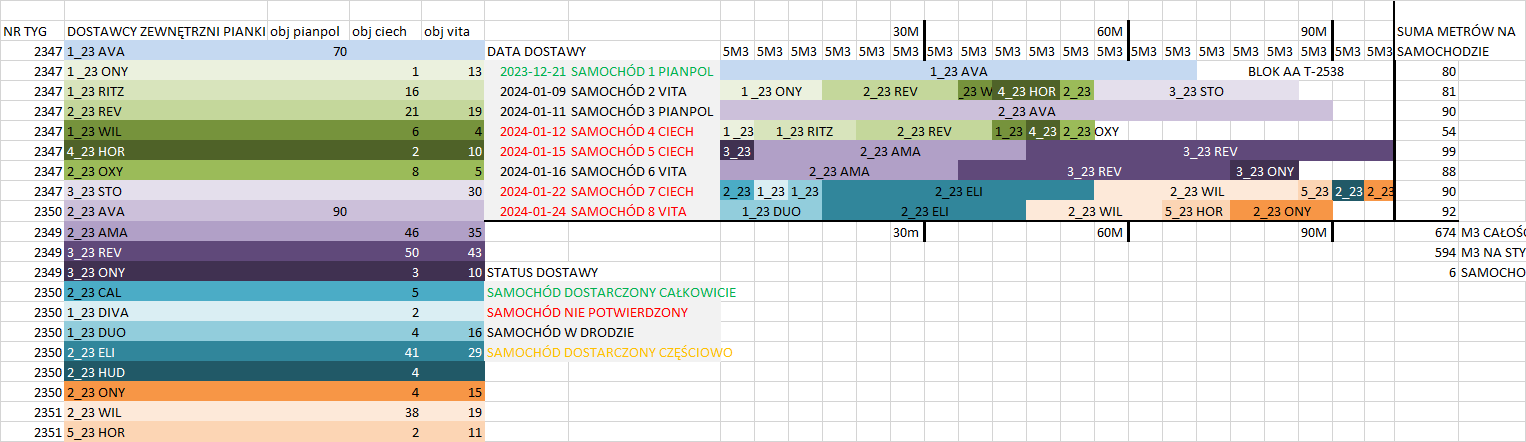

In [ ]:
fig = px.bar(df.sort_values(by="SAMOCHOD"), x="obj", y="SAMOCHOD", color='MODEL', orientation='h',
             text="MODEL",
             hover_data=["DOSTAWCA"],
            #  height=400,
             title='Zapełnienie samochodów 2023-12-20')
fig.update_yaxes(autorange="reversed")
fig.add_vline(x=30)
fig.add_vline(x=60)
fig.add_vline(x=90)
# fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()